# Takes tables with VCF data on the variants of two levels and plots them to the cDNA sequence for each transcript

In [58]:
import pandas as pd
from pyteomics import fasta
from numpy import nan

import matplotlib.colors as mcolors
from matplotlib import pyplot as plt, patches
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec

## 1. Table with all the variants ('level 1 table')

In [59]:
table = pd.read_table('/Users/ksenia/Documents/MODY_genes/pipeline_october2022/221005_level1_MODYvar_clean.tsv')
table.head()

,transcriptID,chromosome,transcript_biotype,variantID,DNA_change,cDNA_change,protein_change,reading_frame,protein_prefix_length,start_lost,splice_site_affected
0,ENST00000493373,1,protein_coding,ENST00000493373_MODYvar_rs71653619_G>A,7970934:G>A,348:G>A,97:R>97:Q,2,18,False,NaN
1,ENST00000493678,1,protein_coding,ENST00000493678_MODYvar_rs71653619_G>A,7970934:G>A,359:G>A,97:R>97:Q,1,22,False,NaN
2,ENST00000377493,1,protein_coding,ENST00000377493_MODYvar_rs71653619_G>A,7970934:G>A,290:G>A,77:R>77:Q,1,19,False,NaN
3,ENST00000338639,1,protein_coding,ENST00000338639_MODYvar_rs71653619_G>A,7970934:G>A,398:G>A,97:R>97:Q,1,35,False,NaN
4,ENST00000377491,1,protein_coding,ENST00000377491_MODYvar_rs71653619_G>A,7970934:G>A,503:G>A,97:R>97:Q,1,70,False,NaN


In [60]:
table = pd.read_table('/Users/ksenia/Documents/MODY_genes/pipeline_october2022/221005_level1_MODYvar_clean.tsv')
table = table.rename(columns={"transcriptID": "transcript_id"})
transcripts = table['transcript_id'].tolist()


data_names = []
with fasta.read('/Users/ksenia/Documents/FASTA/total_cdnas.fa') as f:
    for prot in f:
        transcript_ID = prot.description.split('.')[0]
        for item in transcripts:
            if item == transcript_ID:
                if 'gene_symbol:' in prot.description:
                    gene_name = prot.description.split('gene_symbol:')[1].split(' ')[0]
                    data_names.append({'transcript_id': transcript_ID, 
                                       'gene_name': gene_name, 
                                       'description': prot.description,
                                       'cDNA_sequence': prot.sequence})
                        
                        
name_frame = pd.DataFrame(data_names).drop_duplicates().reset_index(drop=True)
table_names = pd.merge(table, name_frame, how='outer', on = 'transcript_id').replace(nan, '')
var_gene_names = table_names[table_names['gene_name'] != ''].reset_index(drop=True)

#######
info = []
genes = var_gene_names['gene_name'].unique()
for gene in genes:
    info.append({'gene': gene, 'transcripts': 
                 len(var_gene_names[var_gene_names['gene_name'] == gene]['transcript_id'].unique()), 'variants':
                 len(var_gene_names[var_gene_names['gene_name'] == gene]['DNA_change'].unique())})
info_df = pd.DataFrame(info)
info_df.to_csv(
    '/Users/ksenia/Documents/MODY_genes/visualization/info_level1.csv',
    header=True, index=False)
#######

var_gene_names.to_csv(
    '/Users/ksenia/Documents/MODY_genes/visualization/all_variants_gene_names_cDNA_sequences.csv',
    header=True, index=False)


In [61]:
var_gene_names

,transcript_id,chromosome,transcript_biotype,variantID,DNA_change,cDNA_change,protein_change,reading_frame,protein_prefix_length,start_lost,splice_site_affected,gene_name,description,cDNA_sequence
0,ENST00000493373,1,protein_coding,ENST00000493373_MODYvar_rs71653619_G>A,7970934:G>A,348:G>A,97:R>97:Q,2,18,False,,PARK7,ENST00000493373.5 cdna chromosome:GRCh38:1:795...,CCGGAAGTGGACCTACGTCATGCAGGTCAGTCGGCTTGTAAACATA...
1,ENST00000493678,1,protein_coding,ENST00000493678_MODYvar_rs71653619_G>A,7970934:G>A,359:G>A,97:R>97:Q,1,22,False,,PARK7,ENST00000493678.5 cdna chromosome:GRCh38:1:796...,CGCGCGTGCGTGCTGGCGTGCGTTCATTTTCAGCCTGGTGTGGGGC...
2,ENST00000377493,1,protein_coding,ENST00000377493_MODYvar_rs71653619_G>A,7970934:G>A,290:G>A,77:R>77:Q,1,19,False,,PARK7,ENST00000377493.9 cdna chromosome:GRCh38:1:796...,GTGCTGGCGTGCGTTCATTTTCAGCCTGGTGTGGGGCTTGTAAACA...
3,ENST00000338639,1,protein_coding,ENST00000338639_MODYvar_rs71653619_G>A,7970934:G>A,398:G>A,97:R>97:Q,1,35,False,,PARK7,ENST00000338639.10 cdna chromosome:GRCh38:1:79...,GCGTTCATTTTCAGCCTGGTGTGGGGTGAGTGGTACCCAACGGGCC...
4,ENST00000377491,1,protein_coding,ENST00000377491_MODYvar_rs71653619_G>A,7970934:G>A,503:G>A,97:R>97:Q,1,70,False,,PARK7,ENST00000377491.5 cdna chromosome:GRCh38:1:796...,AGAACCGGCGCGGGGCCTGGGTCGGGGCCGCCCTCGCTTCCGGCCT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24446,ENST00000303391,X,protein_coding,ENST00000303391_MODYvar_rs28934906_G>A,154031355:G>A,684:C>T,157:T>157:M,2,70,False,,MECP2,ENST00000303391.11 cdna chromosome:GRCh38:X:15...,GCGCGCGCTCCCTCCTCTCGGAGAGAGGGCTGTGGTAAAAGCCGTC...
24447,ENST00000453960,X,protein_coding,ENST00000453960_MODYvar_rs61751444_G>A,154030903:G>A,1012:C>T,320:R>320:W,1,17,False,,MECP2,ENST00000453960.7 cdna chromosome:GRCh38:X:154...,GCGCGCGCTCCCTCCTCTCGGAGAGAGGGCTGTGGTAAAAGCCGTC...
24448,ENST00000453960,X,protein_coding,ENST00000453960_MODYvar_rs28934906_G>A,154031355:G>A,560:C>T,169:T>169:M,1,17,False,,MECP2,ENST00000453960.7 cdna chromosome:GRCh38:X:154...,GCGCGCGCTCCCTCCTCTCGGAGAGAGGGCTGTGGTAAAAGCCGTC...
24449,ENST00000628176,X,protein_coding,ENST00000628176_MODYvar_rs61751444_G>A,154030903:G>A,1047:C>T,271:P>271:P,1,77,False,,MECP2,ENST00000628176.2 cdna chromosome:GRCh38:X:154...,GGGGTCCCGGCGTCGGCGGCGCGCGCGCTCCCTCCTCTCGGAGAGA...


In [62]:
var_gene_names[var_gene_names['reading_frame'] == -1]

,transcript_id,chromosome,transcript_biotype,variantID,DNA_change,cDNA_change,protein_change,reading_frame,protein_prefix_length,start_lost,splice_site_affected,gene_name,description,cDNA_sequence
4398,ENST00000528712,8,protein_coding,ENST00000528712_MODYvar_rs140892695_T>C,11748922:T>C,379:T>C,126:M>126:T|126:C>126:R|125:Y>125:Y,-1,0,True,,GATA4,ENST00000528712.5 cdna chromosome:GRCh38:8:116...,ACAACGTCTCCCTCCCACCCGGCTGAGAACAGCCTGGAATCCCTGT...
4399,ENST00000526716,8,protein_coding,ENST00000526716_MODYvar_rs140892695_T>C,11748922:T>C,160:T>C,53:M>53:T|53:C>53:R|52:Y>52:Y,-1,0,True,,GATA4,ENST00000526716.5 cdna chromosome:GRCh38:8:117...,AGTCAGCGCCCTAGGGCCGAGTTGCTGGGCCGGGGACCCGAGCCGC...
5128,ENST00000356578,11,nonsense_mediated_decay,ENST00000356578_MODYvar_rs397515521_C>T,2160969:C>T,61:G>A,20:W>20:*|20:G>20:S|19:M>19:I,-1,0,True,,INS-IGF2,ENST00000356578.8 cdna chromosome:GRCh38:11:21...,AGCCCTCCAGGACAGGCTGCATCAGAAGAGGCCATCAAGCAGATCA...
5129,ENST00000356578,11,nonsense_mediated_decay,ENST00000356578_MODYvar_rs397515521_C>A,2160969:C>A,61:G>T,20:W>20:L|20:G>20:C|19:M>19:I,-1,0,True,,INS-IGF2,ENST00000356578.8 cdna chromosome:GRCh38:11:21...,AGCCCTCCAGGACAGGCTGCATCAGAAGAGGCCATCAAGCAGATCA...
5157,ENST00000397270,11,protein_coding,ENST00000397270_MODYvar_rs397515521_C>T,2160969:C>T,61:G>A,20:W>20:*|20:G>20:S|19:M>19:I,-1,0,True,,INS-IGF2,ENST00000397270.1 cdna chromosome:GRCh38:11:21...,AGCCCTCCAGGACAGGCTGCATCAGAAGAGGCCATCAAGCAGATCA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24427,ENST00000518685,X,protein_coding,ENST00000518685_MODYvar_rs122467174_C>T,49258503:C>T,2:G>A,0:M>0:I|0:C>0:Y|0:A>0:T,-1,0,True,,FOXP3,ENST00000518685.6 cdna chromosome:GRCh38:X:492...,ATGCCCAACCCCAGGCCTGGCAAGCCCTCGGCCCCTTCCTTGGCCC...
24434,ENST00000557224,X,protein_coding,ENST00000557224_MODYvar_rs122467174_C>T,49258503:C>T,74:G>A,24:M>24:I|24:C>24:Y|24:A>24:T,-1,0,True,,FOXP3,ENST00000557224.6 cdna chromosome:GRCh38:X:492...,AGTTTCCCACAAGCCAGGCTGATCCTTTTCTGTCAGTCCACTTCAC...
24439,ENST00000652559,X,protein_coding,ENST00000652559_MODYvar_rs122467174_C>T,49258503:C>T,44:G>A,14:M>14:I|14:C>14:Y|14:A>14:T,-1,0,True,,FOXP3,ENST00000652559.1 cdna chromosome:GRCh38:X:492...,TGTCAGTCCACTTCACCAAGCCTGCCCTTGGACAAGGACCCGATGC...
24443,ENST00000684155,X,protein_coding,ENST00000684155_MODYvar_rs122467174_C>T,49258503:C>T,74:G>A,24:M>24:I|24:C>24:Y|24:A>24:T,-1,0,True,,FOXP3,ENST00000684155.1 cdna chromosome:GRCh38:X:492...,AGTTTCCCACAAGCCAGGCTGATCCTTTTCTGTCAGTCCACTTCAC...


In [63]:
info_df

,gene,transcripts,variants
0,PARK7,6,1
1,LEPR,6,16
2,LMNA,22,9
3,GPR161,5,1
4,SLC19A2,3,7
...,...,...,...
72,KCNQ2,10,1
73,LZTR1,1,2
74,SHANK3,3,1
75,FOXP3,9,7


## 2. The same for the 'level 2' more confident filtered variants

In [65]:
table2 = pd.read_table('/Users/ksenia/Documents/MODY_genes/pipeline_october2022/221018_level2_MODYvar_clean.tsv')
table2.head()

,transcriptID,chromosome,transcript_biotype,variantID,DNA_change,cDNA_change,protein_change,reading_frame,protein_prefix_length,start_lost,splice_site_affected
0,ENST00000682931,1,protein_coding,ENST00000682931_MODYvar_rs200635937_A>T,168104855:A>T,231:T>A,-2:L>-2:Q,2,78,False,NaN
1,ENST00000271357,1,protein_coding,ENST00000271357_MODYvar_rs200635937_A>T,168104855:A>T,223:T>A,15:L>15:Q,0,59,False,NaN
2,ENST00000537209,1,protein_coding,ENST00000537209_MODYvar_rs200635937_A>T,168104855:A>T,673:T>A,18:L>18:Q,0,206,False,NaN
3,ENST00000367838,1,protein_coding,ENST00000367838_MODYvar_rs200635937_A>T,168104855:A>T,309:T>A,-2:L>-2:Q,2,104,False,NaN
4,ENST00000367835,1,protein_coding,ENST00000367835_MODYvar_rs200635937_A>T,168104855:A>T,552:T>A,-2:L>-2:Q,2,185,False,NaN


In [66]:
table2[table2['reading_frame'] == -1]

,transcriptID,chromosome,transcript_biotype,variantID,DNA_change,cDNA_change,protein_change,reading_frame,protein_prefix_length,start_lost,splice_site_affected
1843,ENST00000356578,11,nonsense_mediated_decay,ENST00000356578_MODYvar_rs397515521_C>A,2160969:C>A,61:G>T,20:W>20:L|20:G>20:C|19:M>19:I,-1,0,True,NaN
1844,ENST00000356578,11,nonsense_mediated_decay,ENST00000356578_MODYvar_rs397515521_C>T,2160969:C>T,61:G>A,20:W>20:*|20:G>20:S|19:M>19:I,-1,0,True,NaN
1862,ENST00000397270,11,protein_coding,ENST00000397270_MODYvar_rs397515521_C>A,2160969:C>A,61:G>T,20:W>20:L|20:G>20:C|19:M>19:I,-1,0,True,NaN
1863,ENST00000397270,11,protein_coding,ENST00000397270_MODYvar_rs397515521_C>T,2160969:C>T,61:G>A,20:W>20:*|20:G>20:S|19:M>19:I,-1,0,True,NaN
1888,ENST00000397262,11,protein_coding,ENST00000397262_MODYvar_rs397515521_C>A,2160969:C>A,235:G>T,78:W>78:L|78:G>78:C|77:M>77:I,-1,0,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5915,ENST00000518685,X,protein_coding,ENST00000518685_MODYvar_rs122467174_C>T,49258503:C>T,2:G>A,0:M>0:I|0:C>0:Y|0:A>0:T,-1,0,True,NaN
5916,ENST00000557224,X,protein_coding,ENST00000557224_MODYvar_rs122467174_C>T,49258503:C>T,74:G>A,24:M>24:I|24:C>24:Y|24:A>24:T,-1,0,True,NaN
5917,ENST00000652559,X,protein_coding,ENST00000652559_MODYvar_rs122467174_C>T,49258503:C>T,44:G>A,14:M>14:I|14:C>14:Y|14:A>14:T,-1,0,True,NaN
5918,ENST00000684155,X,protein_coding,ENST00000684155_MODYvar_rs122467174_C>T,49258503:C>T,74:G>A,24:M>24:I|24:C>24:Y|24:A>24:T,-1,0,True,NaN


In [67]:
table2 = pd.read_table('/Users/ksenia/Documents/MODY_genes/pipeline_october2022/221018_level2_MODYvar_clean.tsv')
table2 = table2.rename(columns={"transcriptID": "transcript_id"})
transcripts2 = table2['transcript_id'].tolist()


data_names2 = []
with fasta.read('/Users/ksenia/Documents/FASTA/total_cdnas.fa') as f:
    for prot in f:
        transcript_ID = prot.description.split('.')[0]
        for item in transcripts2:
            if item == transcript_ID:
                if 'gene_symbol:' in prot.description:
                    gene_name = prot.description.split('gene_symbol:')[1].split(' ')[0]
                    data_names2.append({'transcript_id': transcript_ID, 
                                       'gene_name': gene_name, 
                                       'description': prot.description,
                                       'cDNA_sequence': prot.sequence})
                        
                        
name_frame2 = pd.DataFrame(data_names2).drop_duplicates().reset_index(drop=True)
table_names2 = pd.merge(table2, name_frame2, how='outer', on = 'transcript_id').replace(nan, '')
var_gene_names2 = table_names2[table_names2['gene_name'] != ''].reset_index(drop=True)

#######
info2 = []
genes2 = var_gene_names['gene_name'].unique()
for gene in genes2:
    info2.append({'gene': gene, 'transcripts': 
                 len(var_gene_names[var_gene_names['gene_name'] == gene]['transcript_id'].unique()), 'variants':
                 len(var_gene_names[var_gene_names['gene_name'] == gene]['DNA_change'].unique())})
info_df2 = pd.DataFrame(info2)
info_df2.to_csv(
    '/Users/ksenia/Documents/MODY_genes/visualization/info_level2.csv',
    header=True, index=False)
#######

var_gene_names2.to_csv(
    '/Users/ksenia/Documents/MODY_genes/visualization/all_variants_gene_names_cDNA_sequences_level2.csv',
    header=True, index=False)


## 3. Plotting data from two tables in one plot

In [68]:
genes = var_gene_names2['gene_name'].unique()
genes

array(['GPR161', 'KLF11', 'EIF2AK3', 'SCN1A', 'NEUROD1', 'APPL1',
       'SLC2A2', 'PURA', 'ZFP57', 'RFX6', 'GCK', 'PAX4', 'LEP', 'BLK',
       'GLIS3', 'CEL', 'PTF1A', 'INS-IGF2', 'INS', 'KCNQ1', 'KCNJ11',
       'ABCC8', 'PAX6', 'HNF1A', 'C12orf43', 'PDX1', 'TRIP11', 'MAGEL2',
       'FBN1', 'MLKL', 'HNF1B', 'HNF4A', 'KCNQ2', 'LZTR1', 'SHANK3',
       'FOXP3'], dtype=object)

KLF11
EIF2AK3
NEUROD1
ZFP57
RFX6
GCK
PAX4
BLK
GLIS3
CEL
PTF1A
INS-IGF2
INS
KCNJ11
ABCC8
HNF1A
C12orf43
PDX1
HNF1B
HNF4A


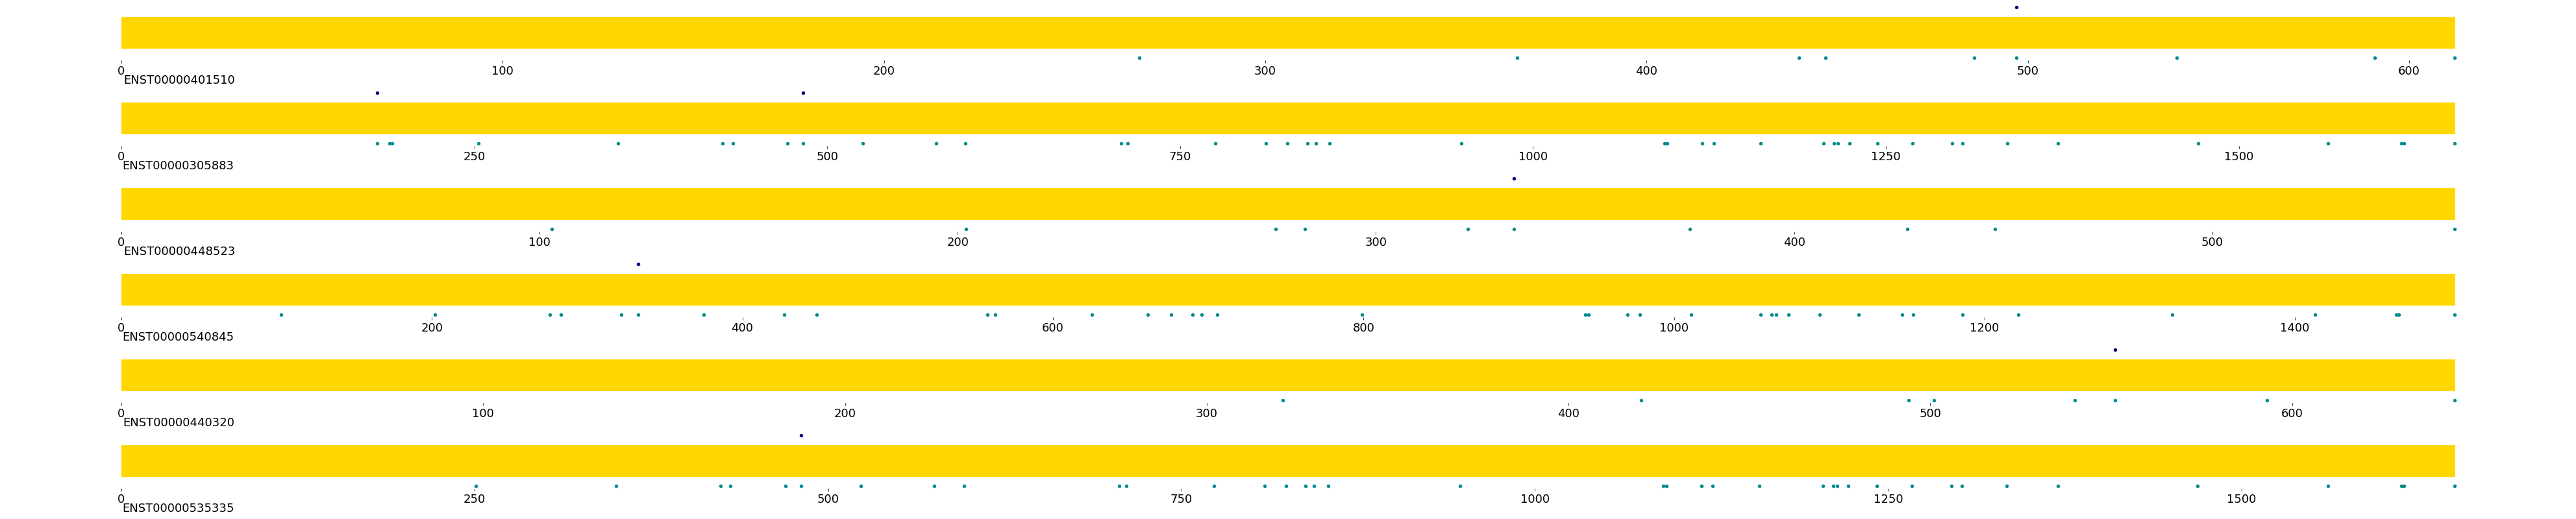

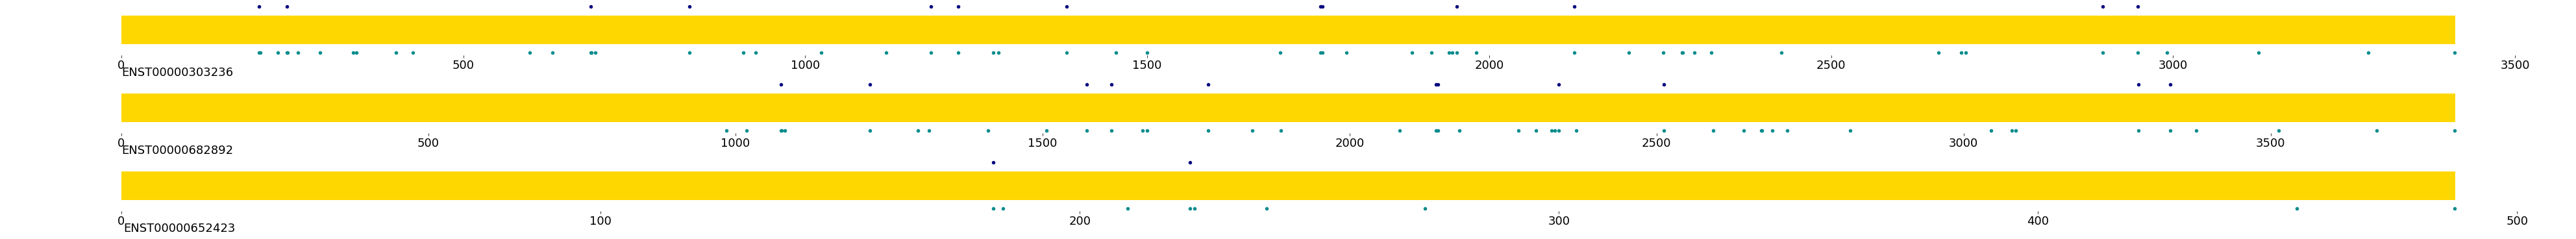

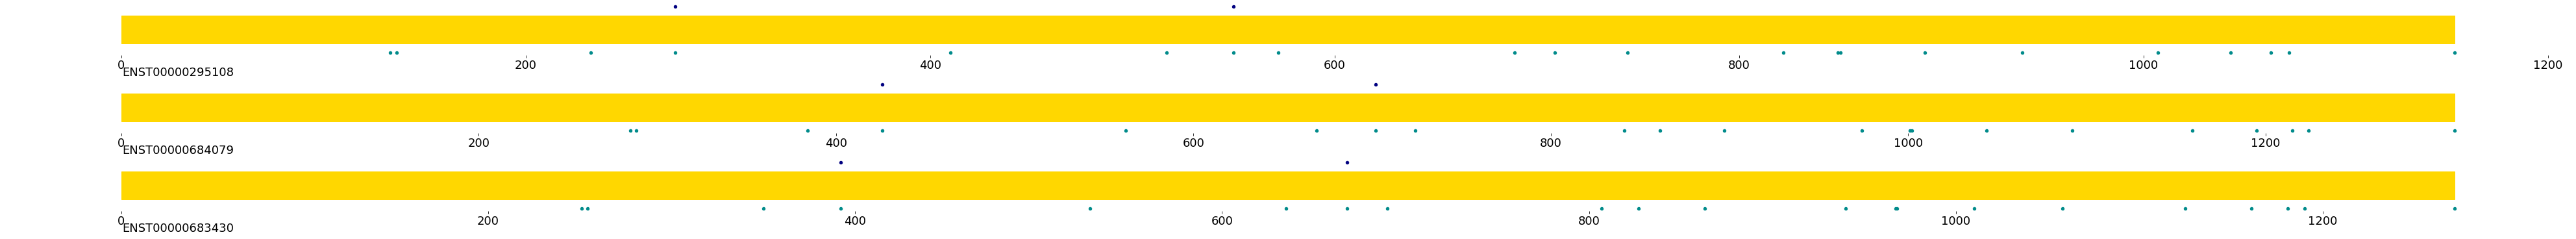

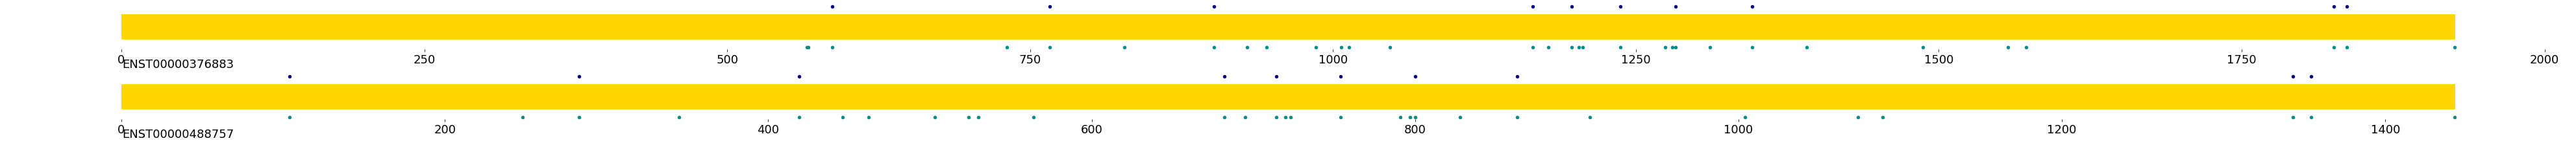

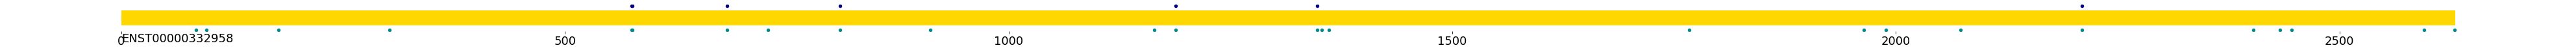

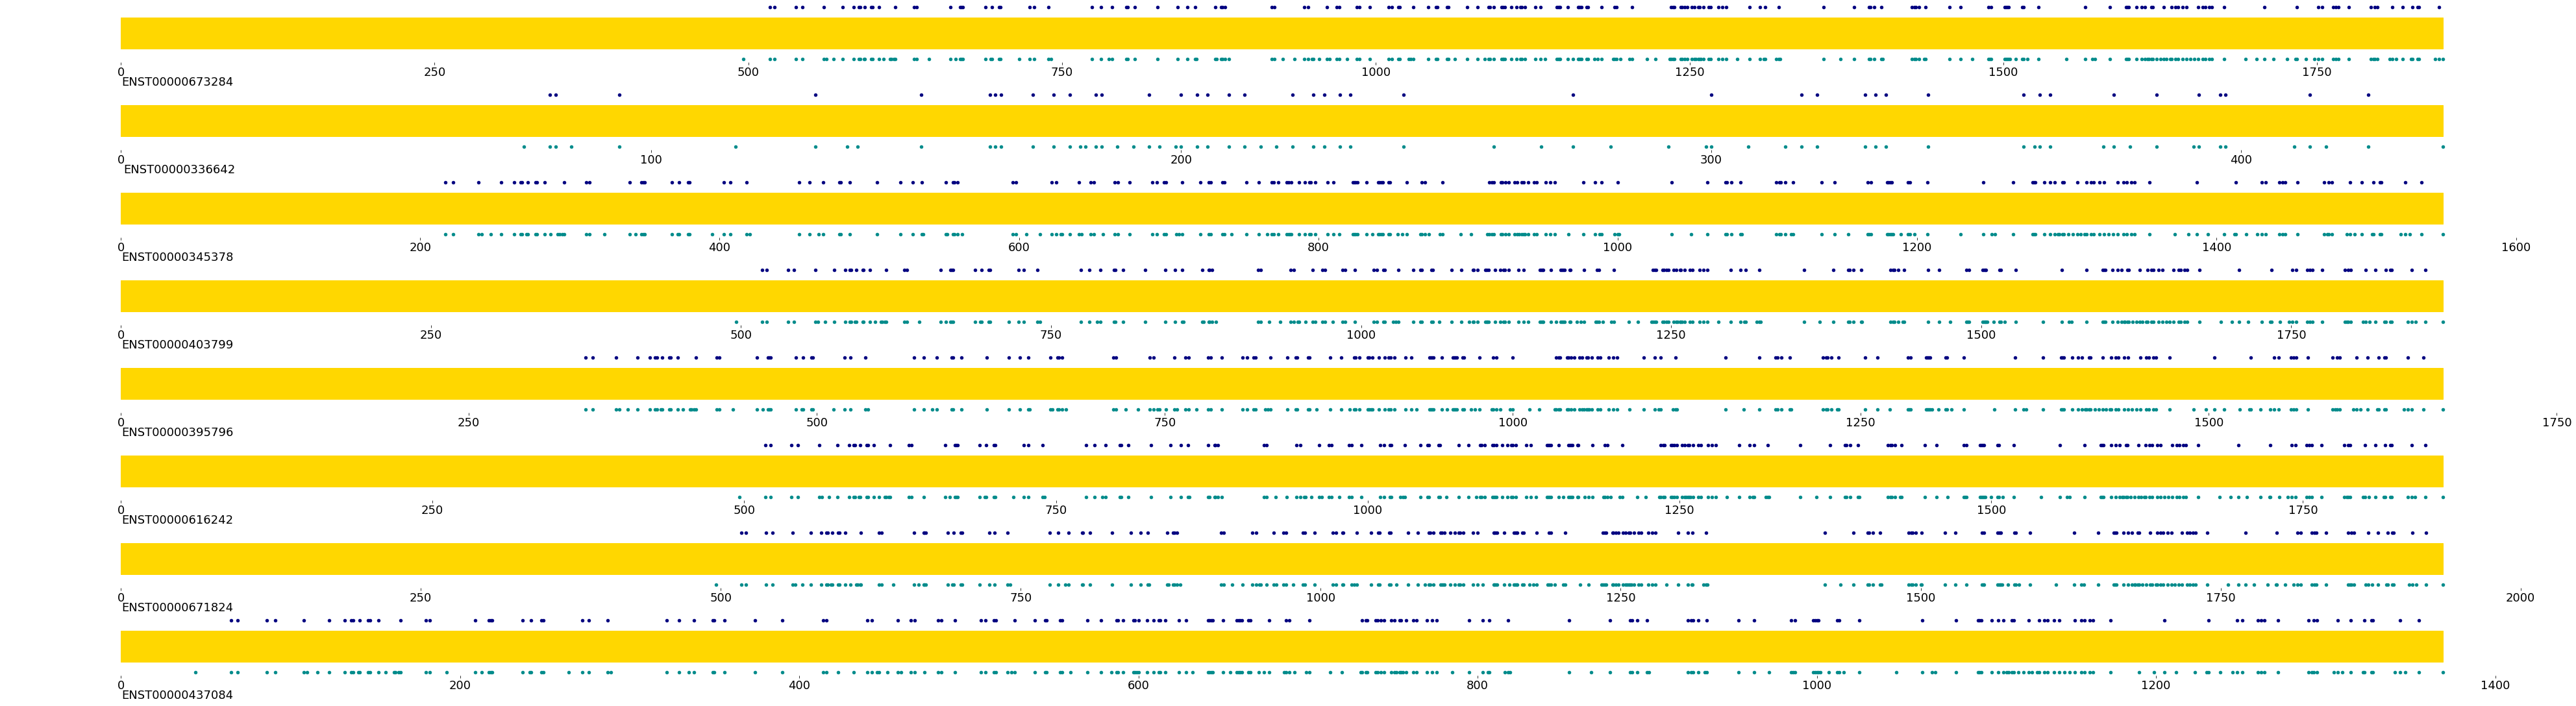

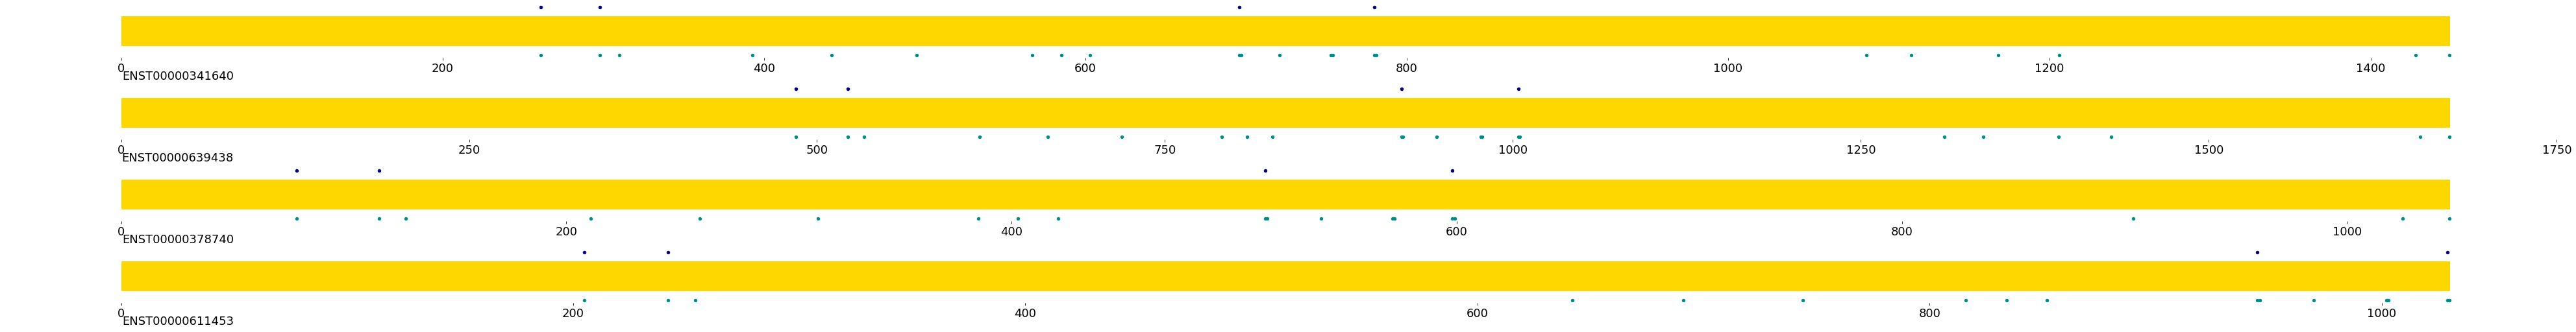

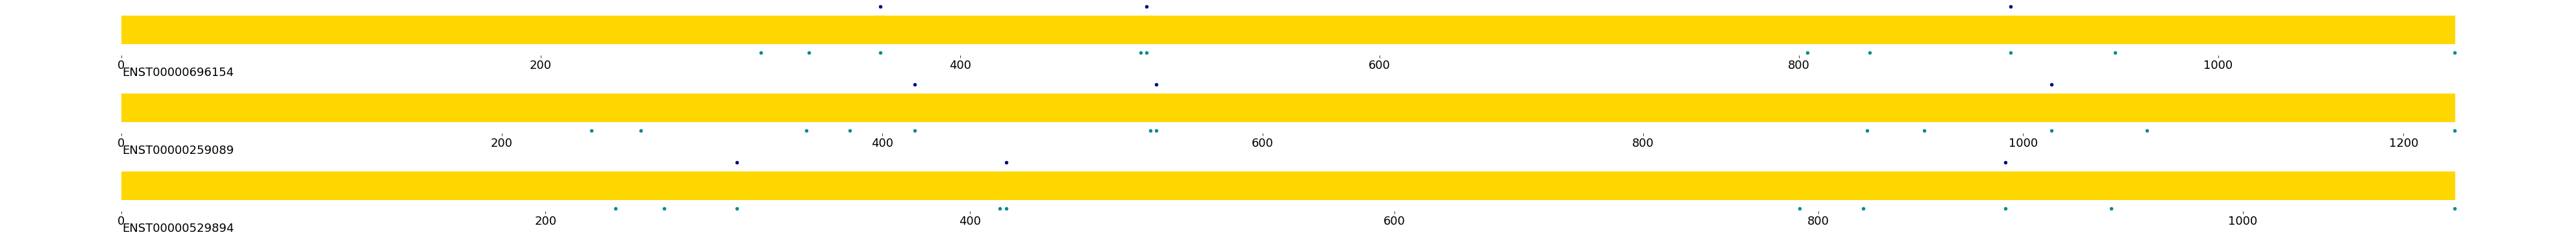

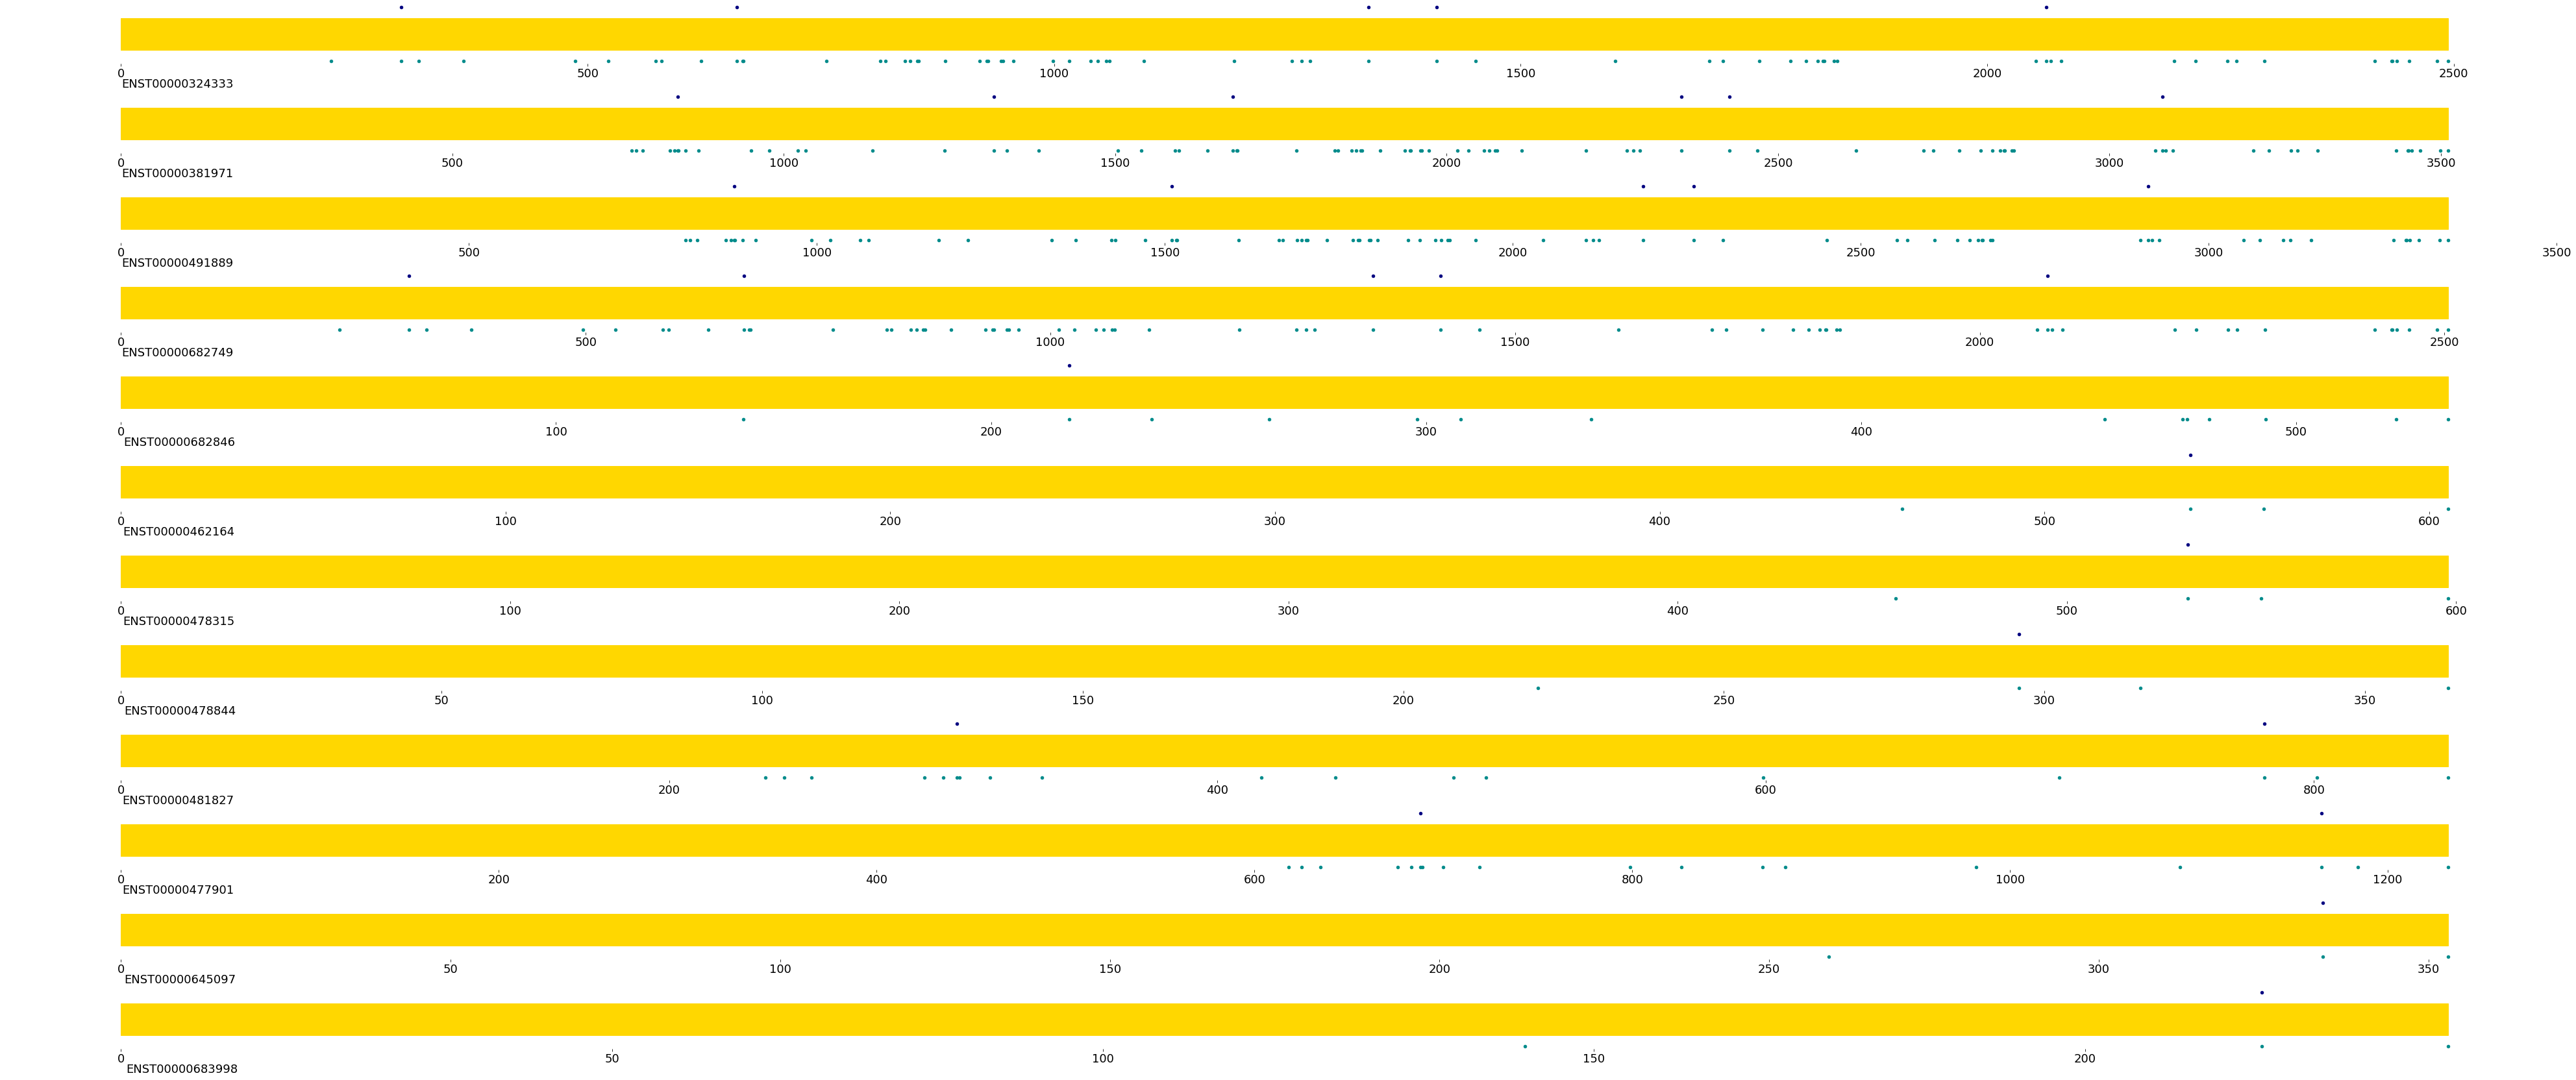

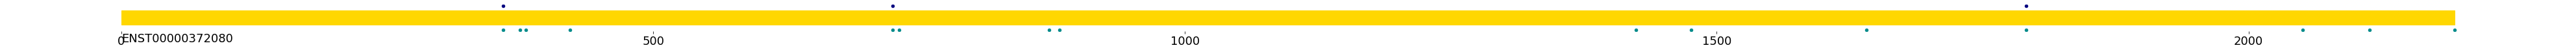

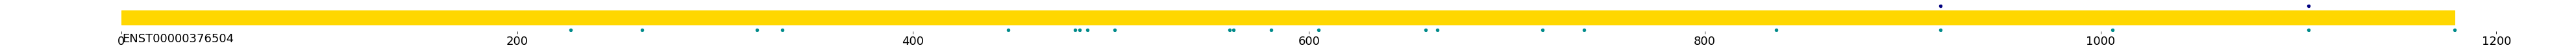

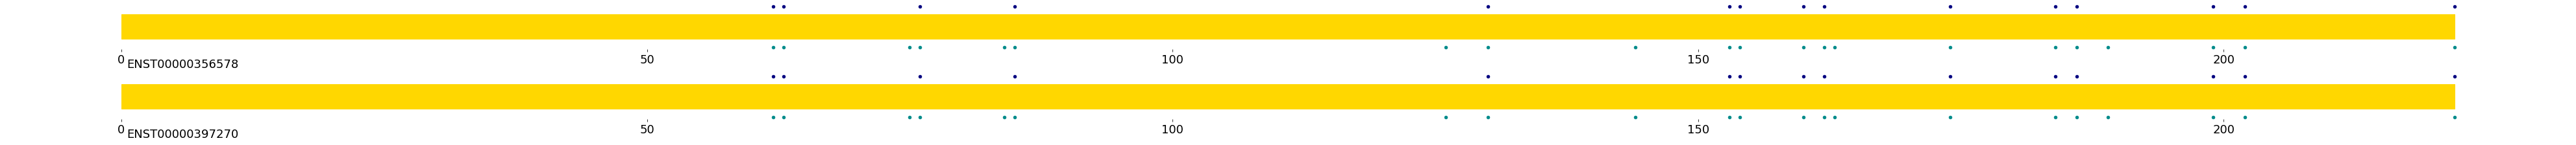

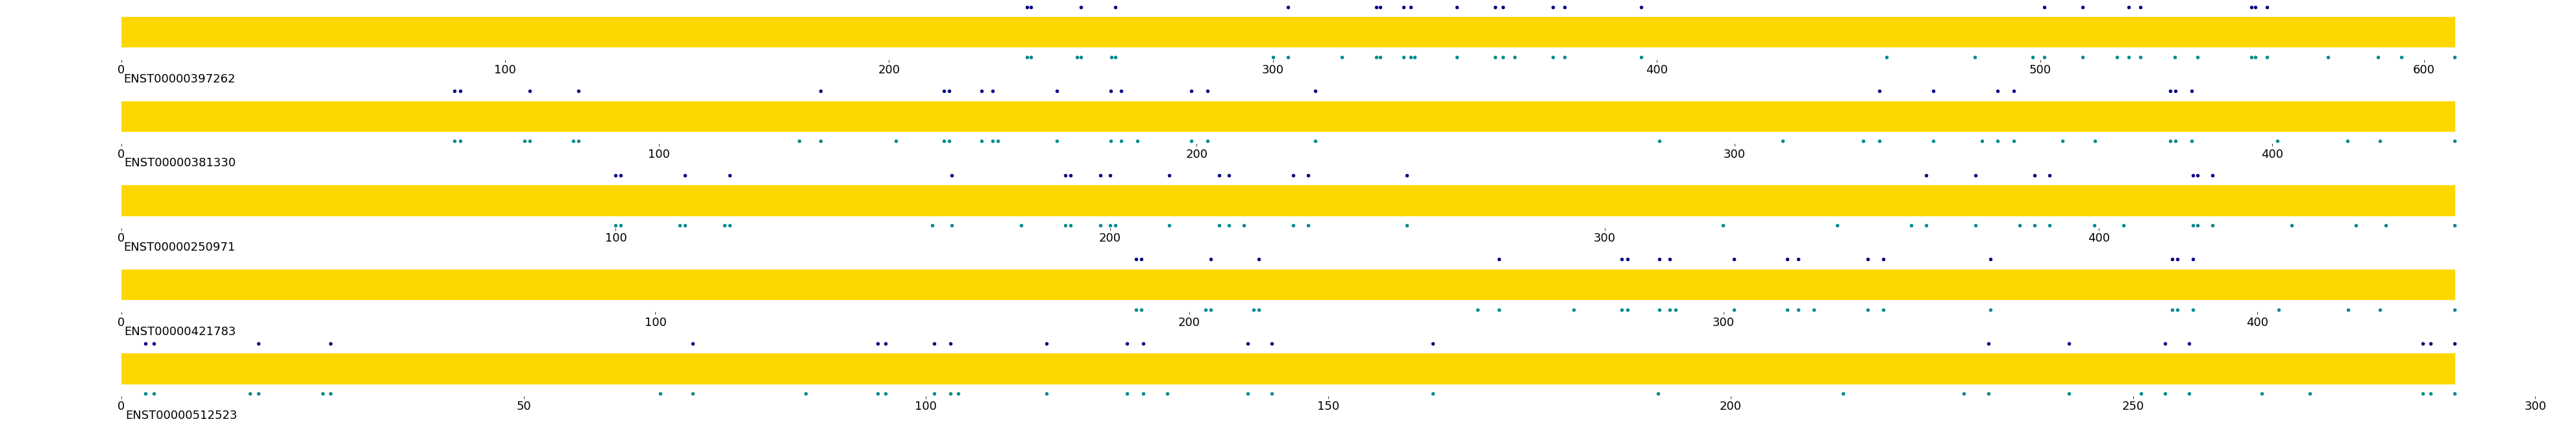

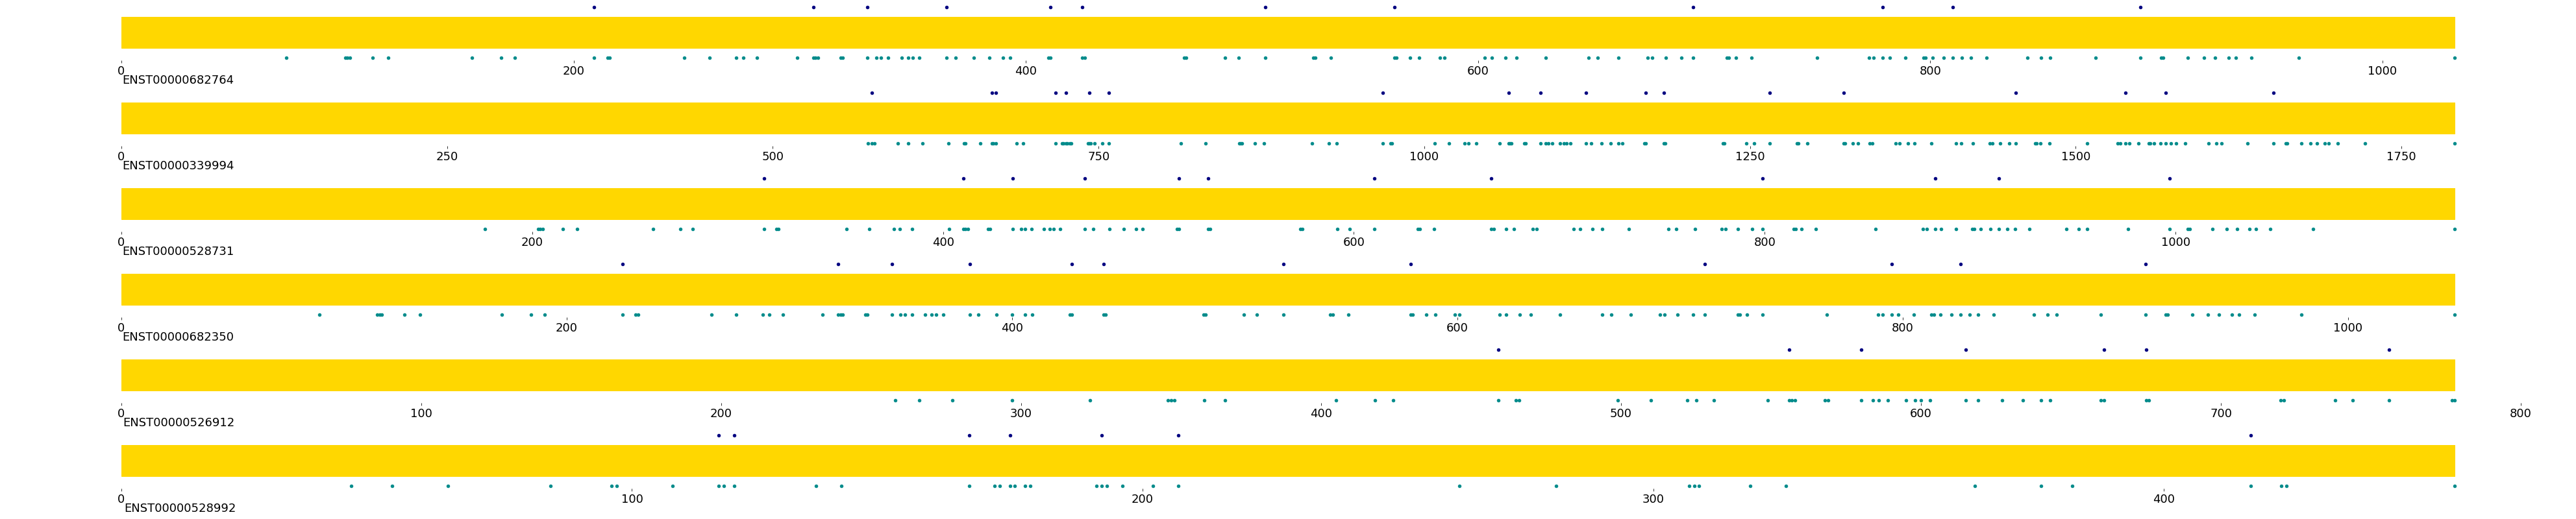

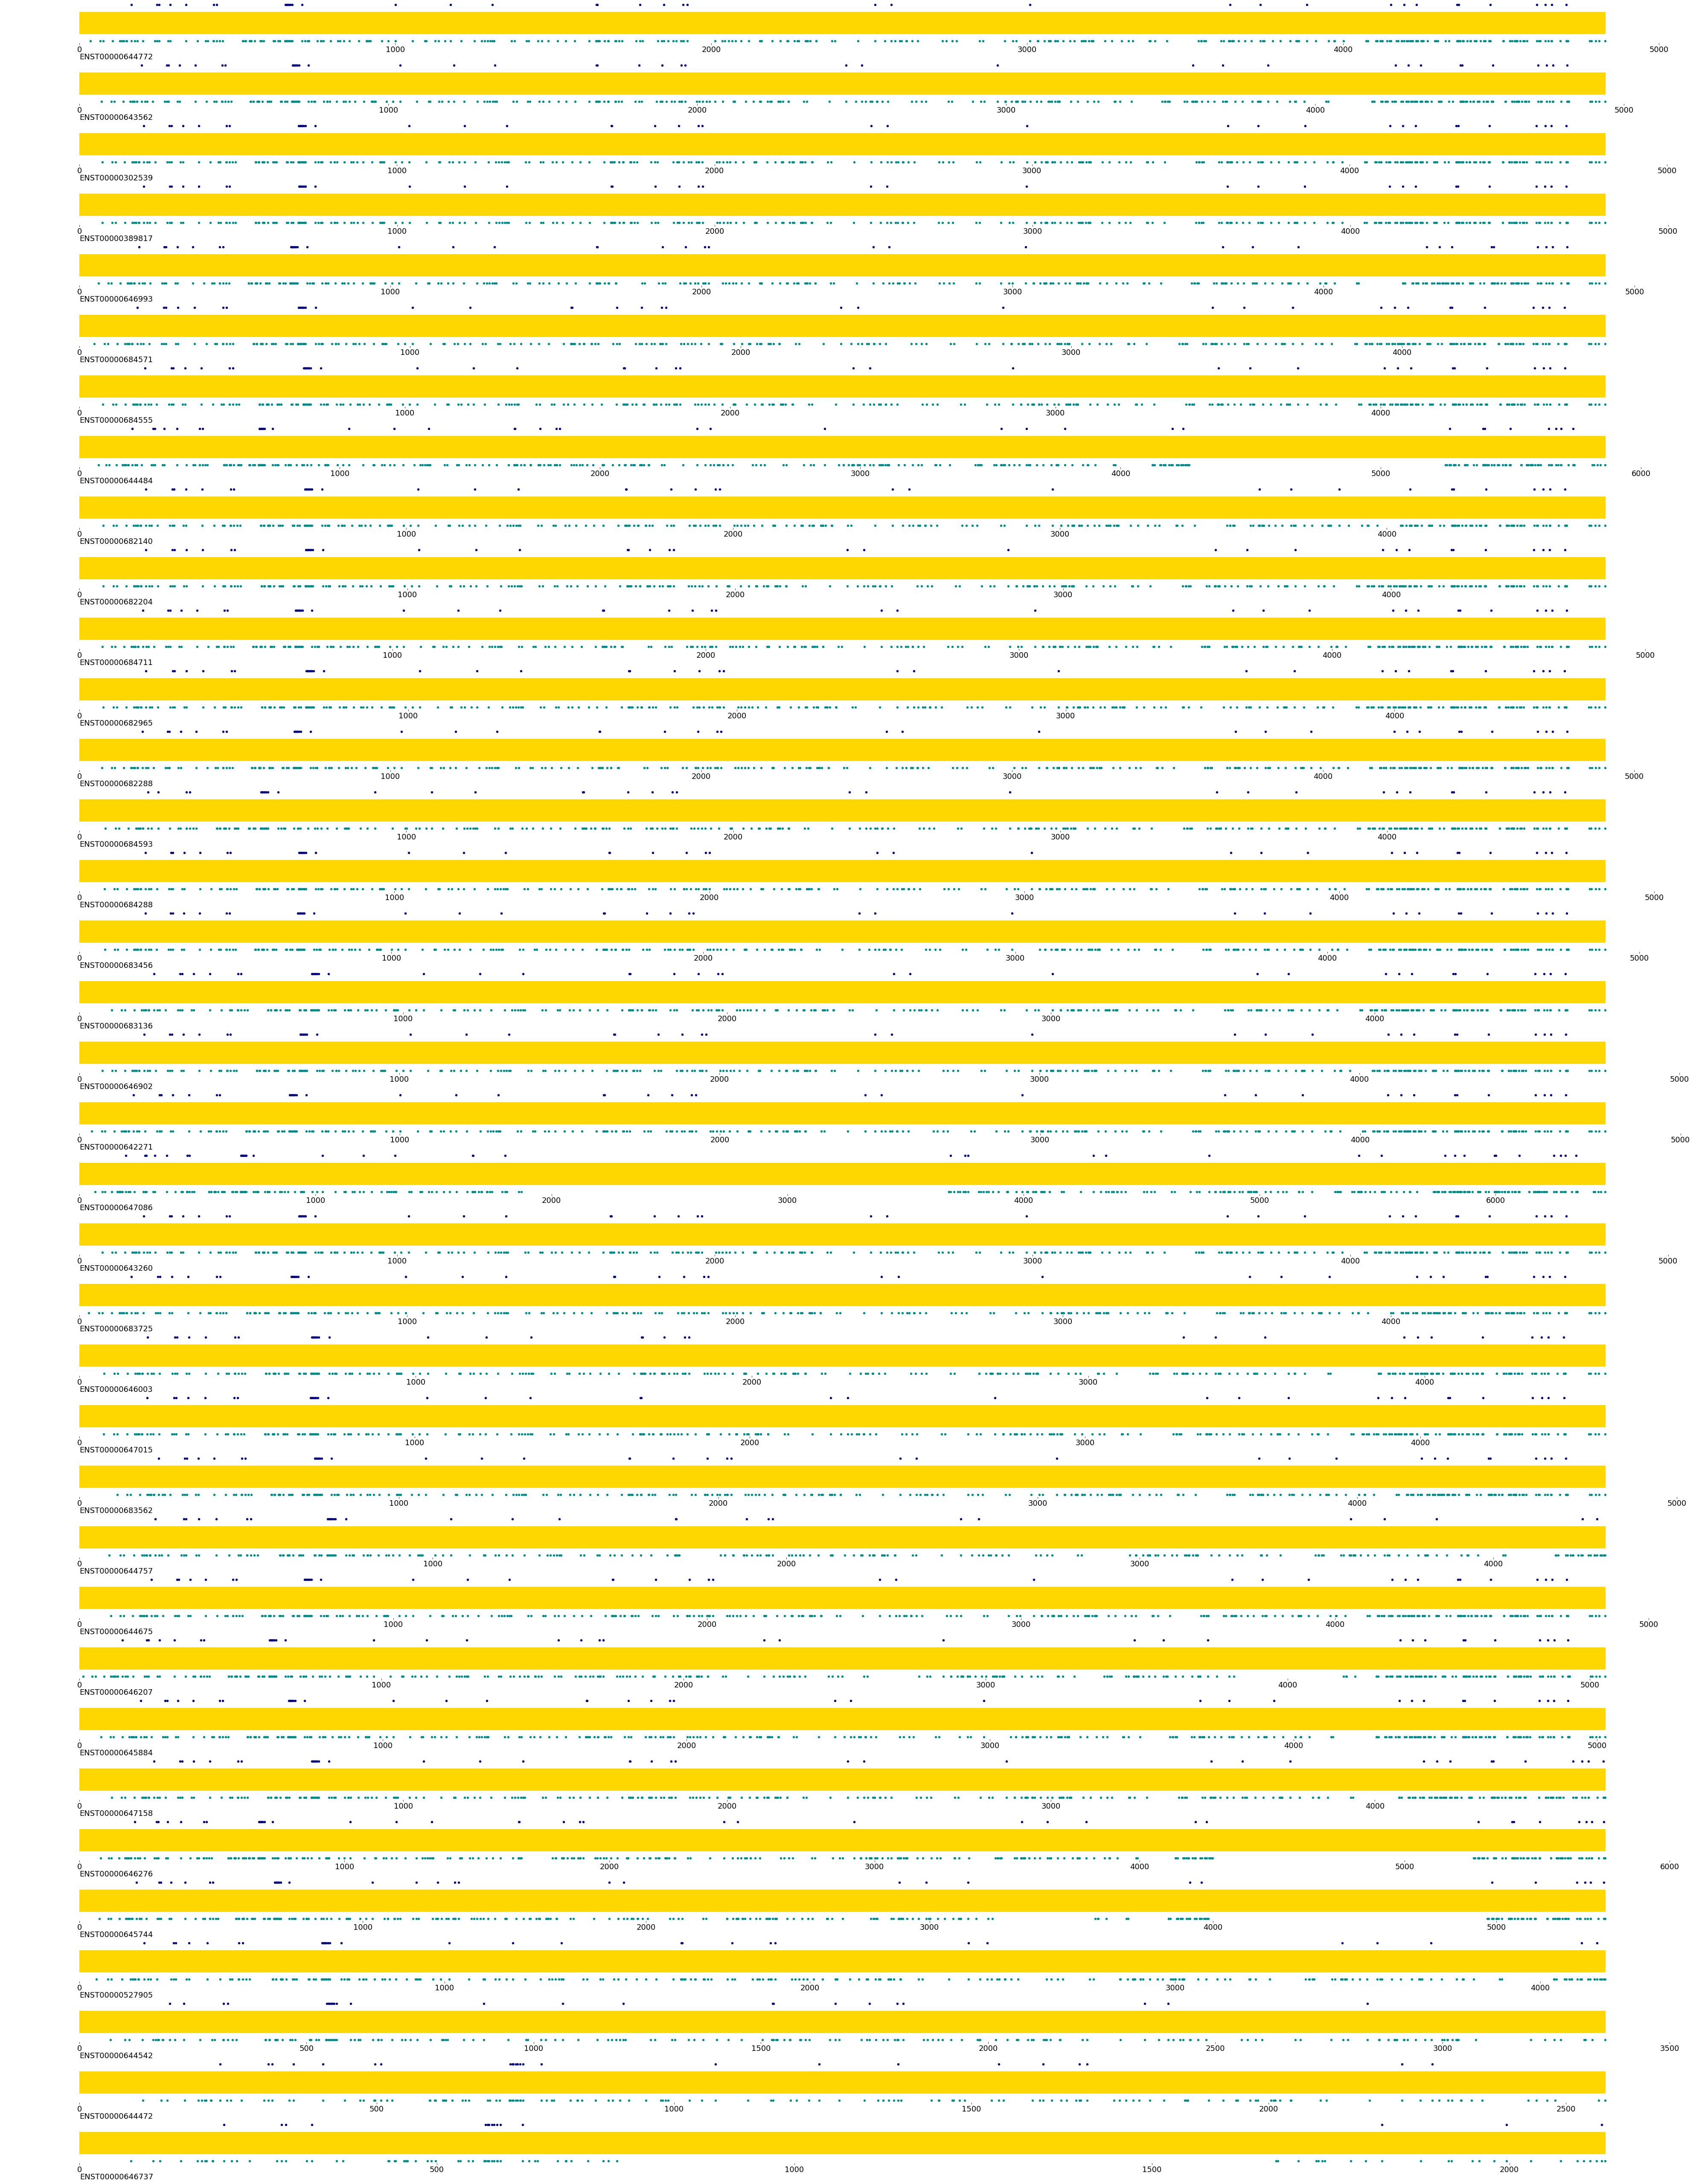

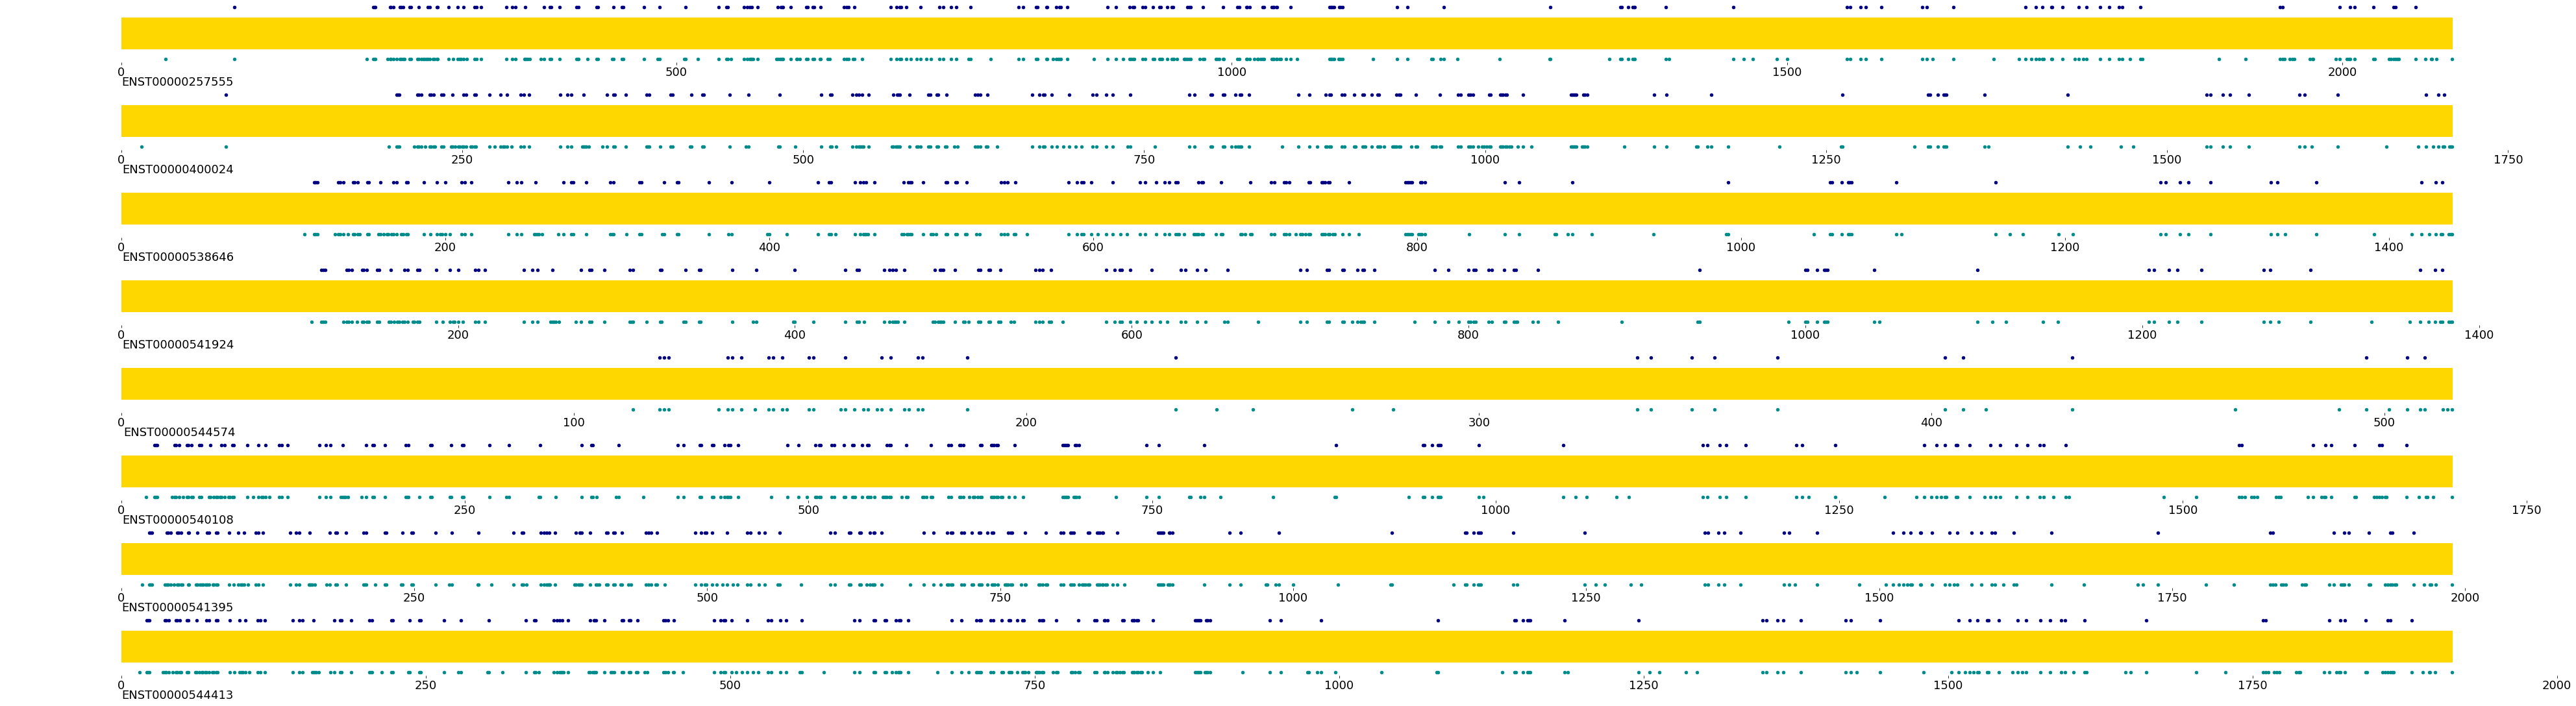

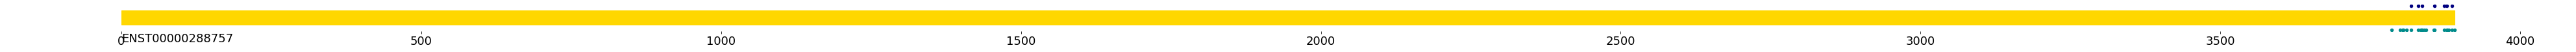

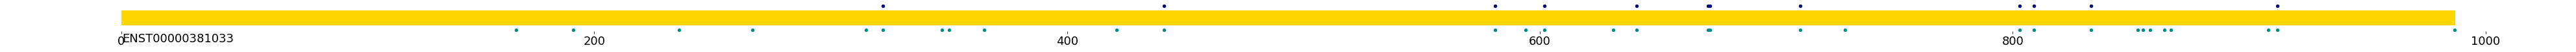

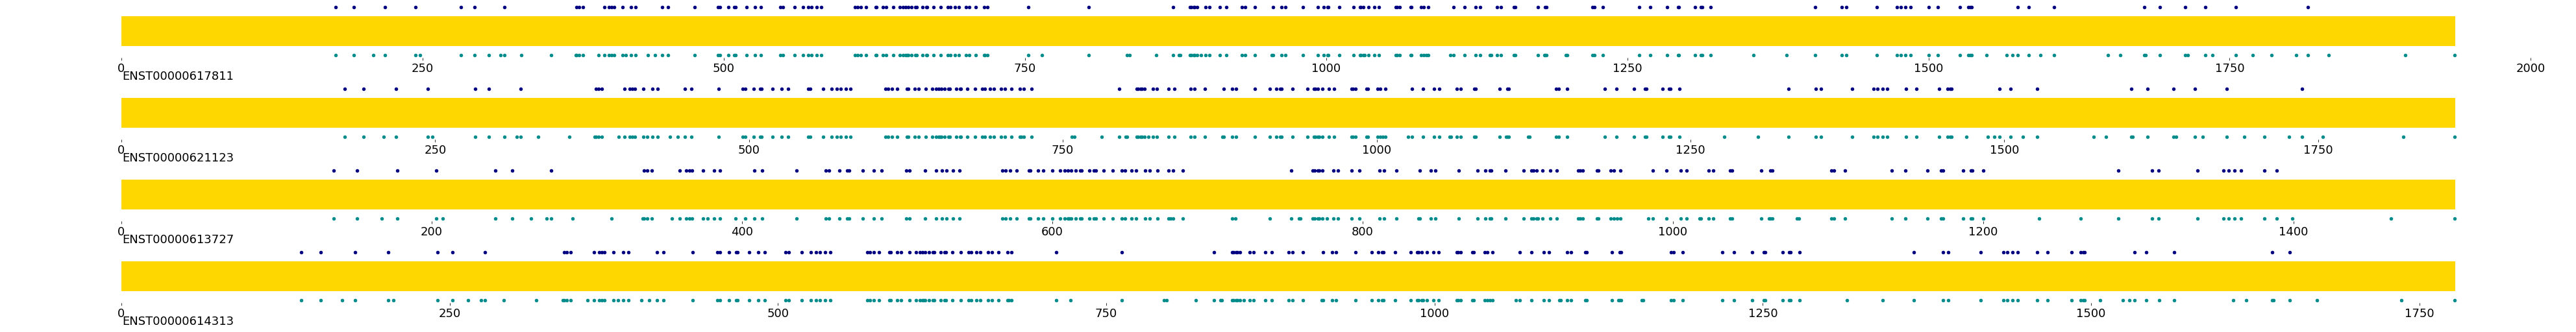

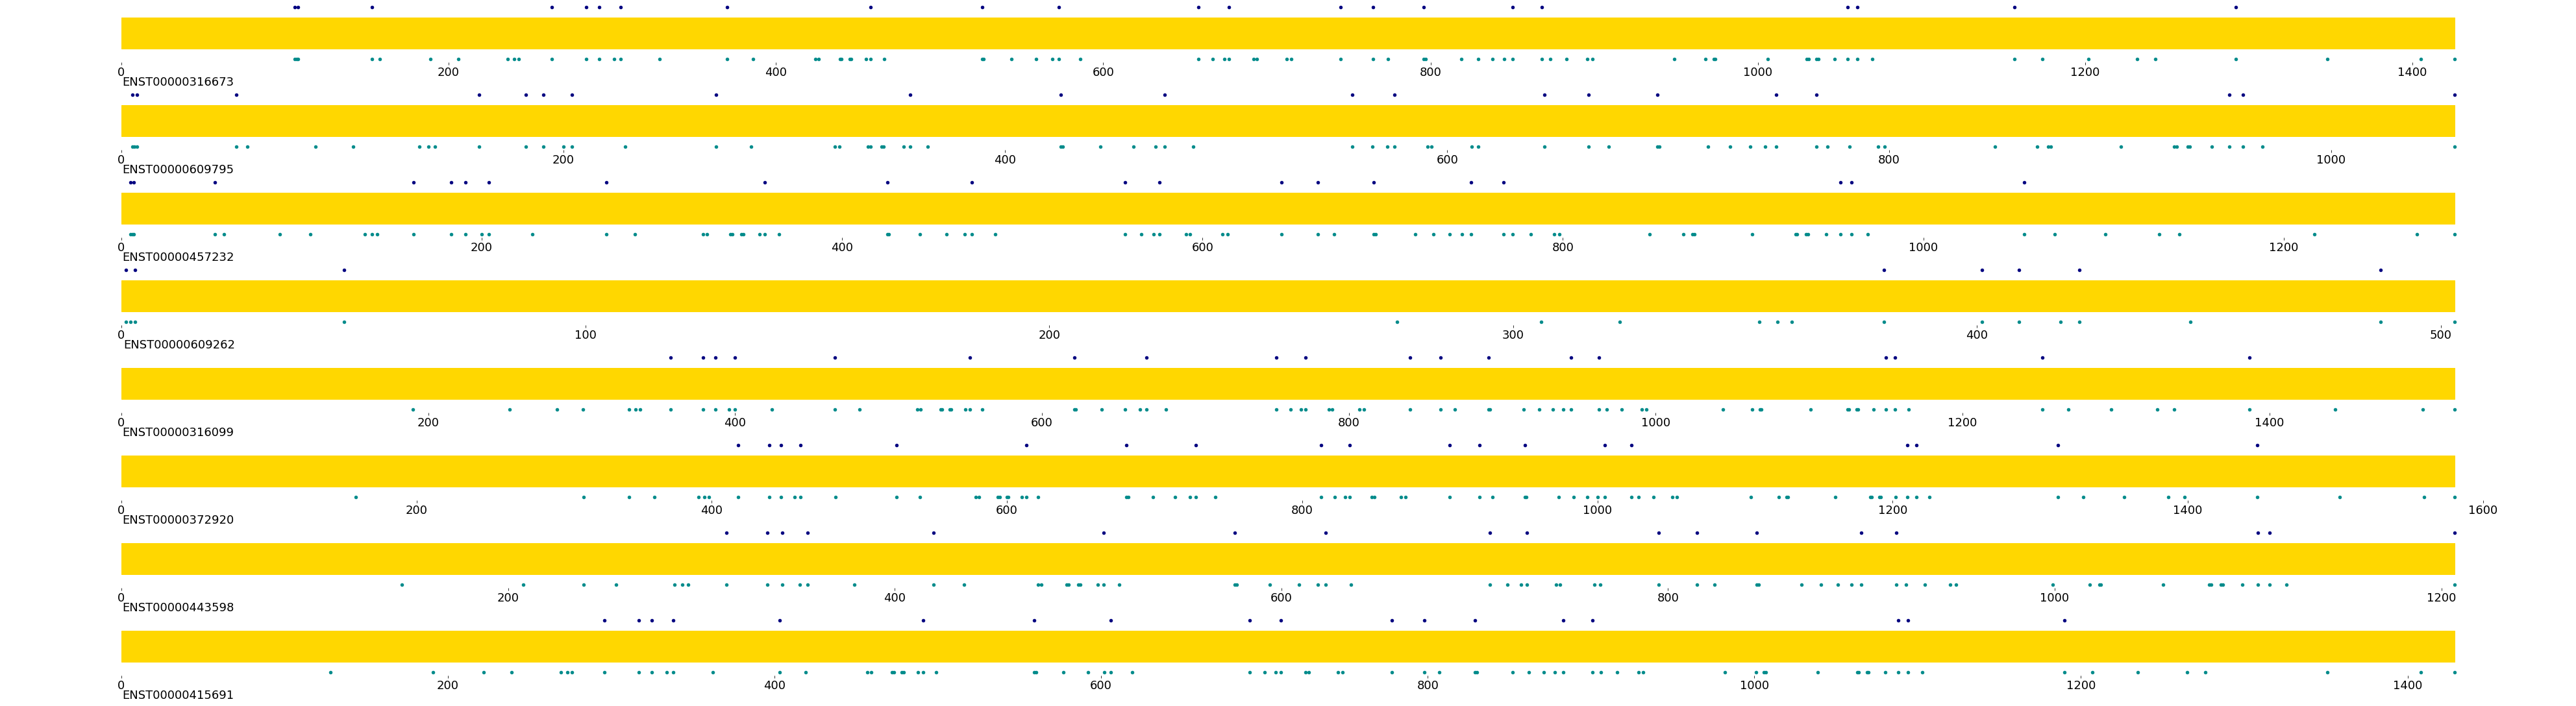

In [69]:
#right code

for gene in genes:
    if int(info_df['variants'][info_df['gene'] == gene]) > 10:
        gene_df = var_gene_names[var_gene_names['gene_name'] == gene]
        gene_df2 = var_gene_names2[var_gene_names2['gene_name'] == gene]
            
        number_of_transcr = int(info_df['transcripts'][info_df['gene'] == gene])
        fig = plt.figure(figsize=(55, (number_of_transcr * 2 - 1)), constrained_layout=True)
        gs = GridSpec(number_of_transcr, 1, figure=fig)
        
        pos_of_subplot = 0
        for transcriptID in gene_df2['transcript_id'].unique().tolist():
            single_trans_df = gene_df[gene_df['transcript_id'] == transcriptID].reset_index(drop=True)
            sequence = single_trans_df['cDNA_sequence'][0]
            cDNA_change = single_trans_df['cDNA_change'].drop_duplicates().tolist()
            cDNA_change.sort(key = lambda x: int(x.split(':')[0]))
            
            ### position1
            sequence_pos = []
            sequence = single_trans_df['cDNA_sequence'][0]
            for change in cDNA_change:
                if change[0] != '-':
                    pos = int(change.split(':')[0]) + 1
                    #if sequence[:pos][-1] != change.replace('>', ':').split(':')[1]:
                        #print(transcriptID, ' ', change)
                    if pos not in sequence_pos:
                        sequence_pos.append(pos)
                                    
            single_trans_df2 = gene_df2[gene_df2['transcript_id'] == transcriptID].reset_index(drop=True)
            sequence2 = single_trans_df2['cDNA_sequence'][0]
            cDNA_change2 = single_trans_df2['cDNA_change'].drop_duplicates().tolist()
            cDNA_change2.sort(key = lambda x: int(x.split(':')[0]))
                        
            ### position2
            sequence_pos2 = []
            sequence2 = single_trans_df2['cDNA_sequence'][0]
            for change in cDNA_change2:
                if change[0] != '-':
                    pos2 = int(change.split(':')[0]) + 1
                #if sequence2[:pos2][-1] != change2.replace('>', ':').split(':')[1]:
                    #print(transcriptID, ' ', change)
                    if pos2 not in sequence_pos2:
                        sequence_pos2.append(pos2)
                        
            y_numbers = str(1) * len(sequence_pos)
            y_int_number_list = []
            for el in y_numbers:
                y_int_number_list.append(int(el))
            y_numbers_2 = str(2) * len(sequence_pos2)
            y_numbers_2_list = []
            for el in y_numbers_2:
                y_numbers_2_list.append(int(el))
            
            ax = fig.add_subplot(gs[pos_of_subplot, :])    
            ax.scatter(sequence_pos, y_int_number_list, s=20, label="all_var", color='darkcyan')
            ax.scatter(sequence_pos2, y_numbers_2_list, s=20, label="short_list", color='navy')
            ax.add_patch(Rectangle((0, 1.2), max(sequence_pos), 0.6, color='gold'))
            ax.yaxis.set_visible(False)
            ax.spines[["left", "top", "right", "bottom"]].set_visible(False)
            ax.text(0.5, 0.5, transcriptID, fontsize=18)
            ax.tick_params(labelsize=18)
            pos_of_subplot = pos_of_subplot + 1
                
        fig.savefig('/Users/ksenia/Documents/MODY_genes/visualization/' + gene + '_cDNA.png', dpi=300)
        print(gene)


## 4. Plotting the rest of genes from the level1 table without the level2 variants

In [70]:
level1_only_genes = set(var_gene_names['gene_name'].unique()) - set(var_gene_names2['gene_name'].unique())
level1_only_genes

{'AGPAT2',
 'AKT2',
 'ALMS1',
 'ASB14',
 'BSCL2',
 'CAV1',
 'CAVIN1',
 'EDEM2',
 'EFL1',
 'FOXP1',
 'GATA4',
 'GATA6',
 'GLUD1',
 'GRIN2B',
 'HADH',
 'HBB',
 'HNRNPUL2-BSCL2',
 'IER3IP1',
 'INSR',
 'ITGB3',
 'KCNH2',
 'KMT2E',
 'LAMA2',
 'LEPR',
 'LMNA',
 'MBL2',
 'MC4R',
 'MECP2',
 'NLRP3',
 'PARK7',
 'PAX2',
 'PDIA6',
 'PLIN1',
 'PPARG',
 'PPP1R3A',
 'PRKAG2',
 'RET',
 'SHLD2',
 'SIM1',
 'SLC19A2',
 'WFS1'}

MC4R
BSCL2
WFS1
INSR
HADH
PLIN1
PPP1R3A
HNRNPUL2-BSCL2
LEPR
AKT2
ALMS1
AGPAT2
GATA6


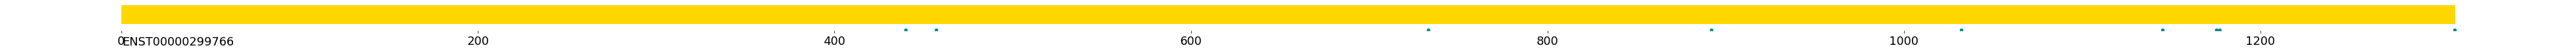

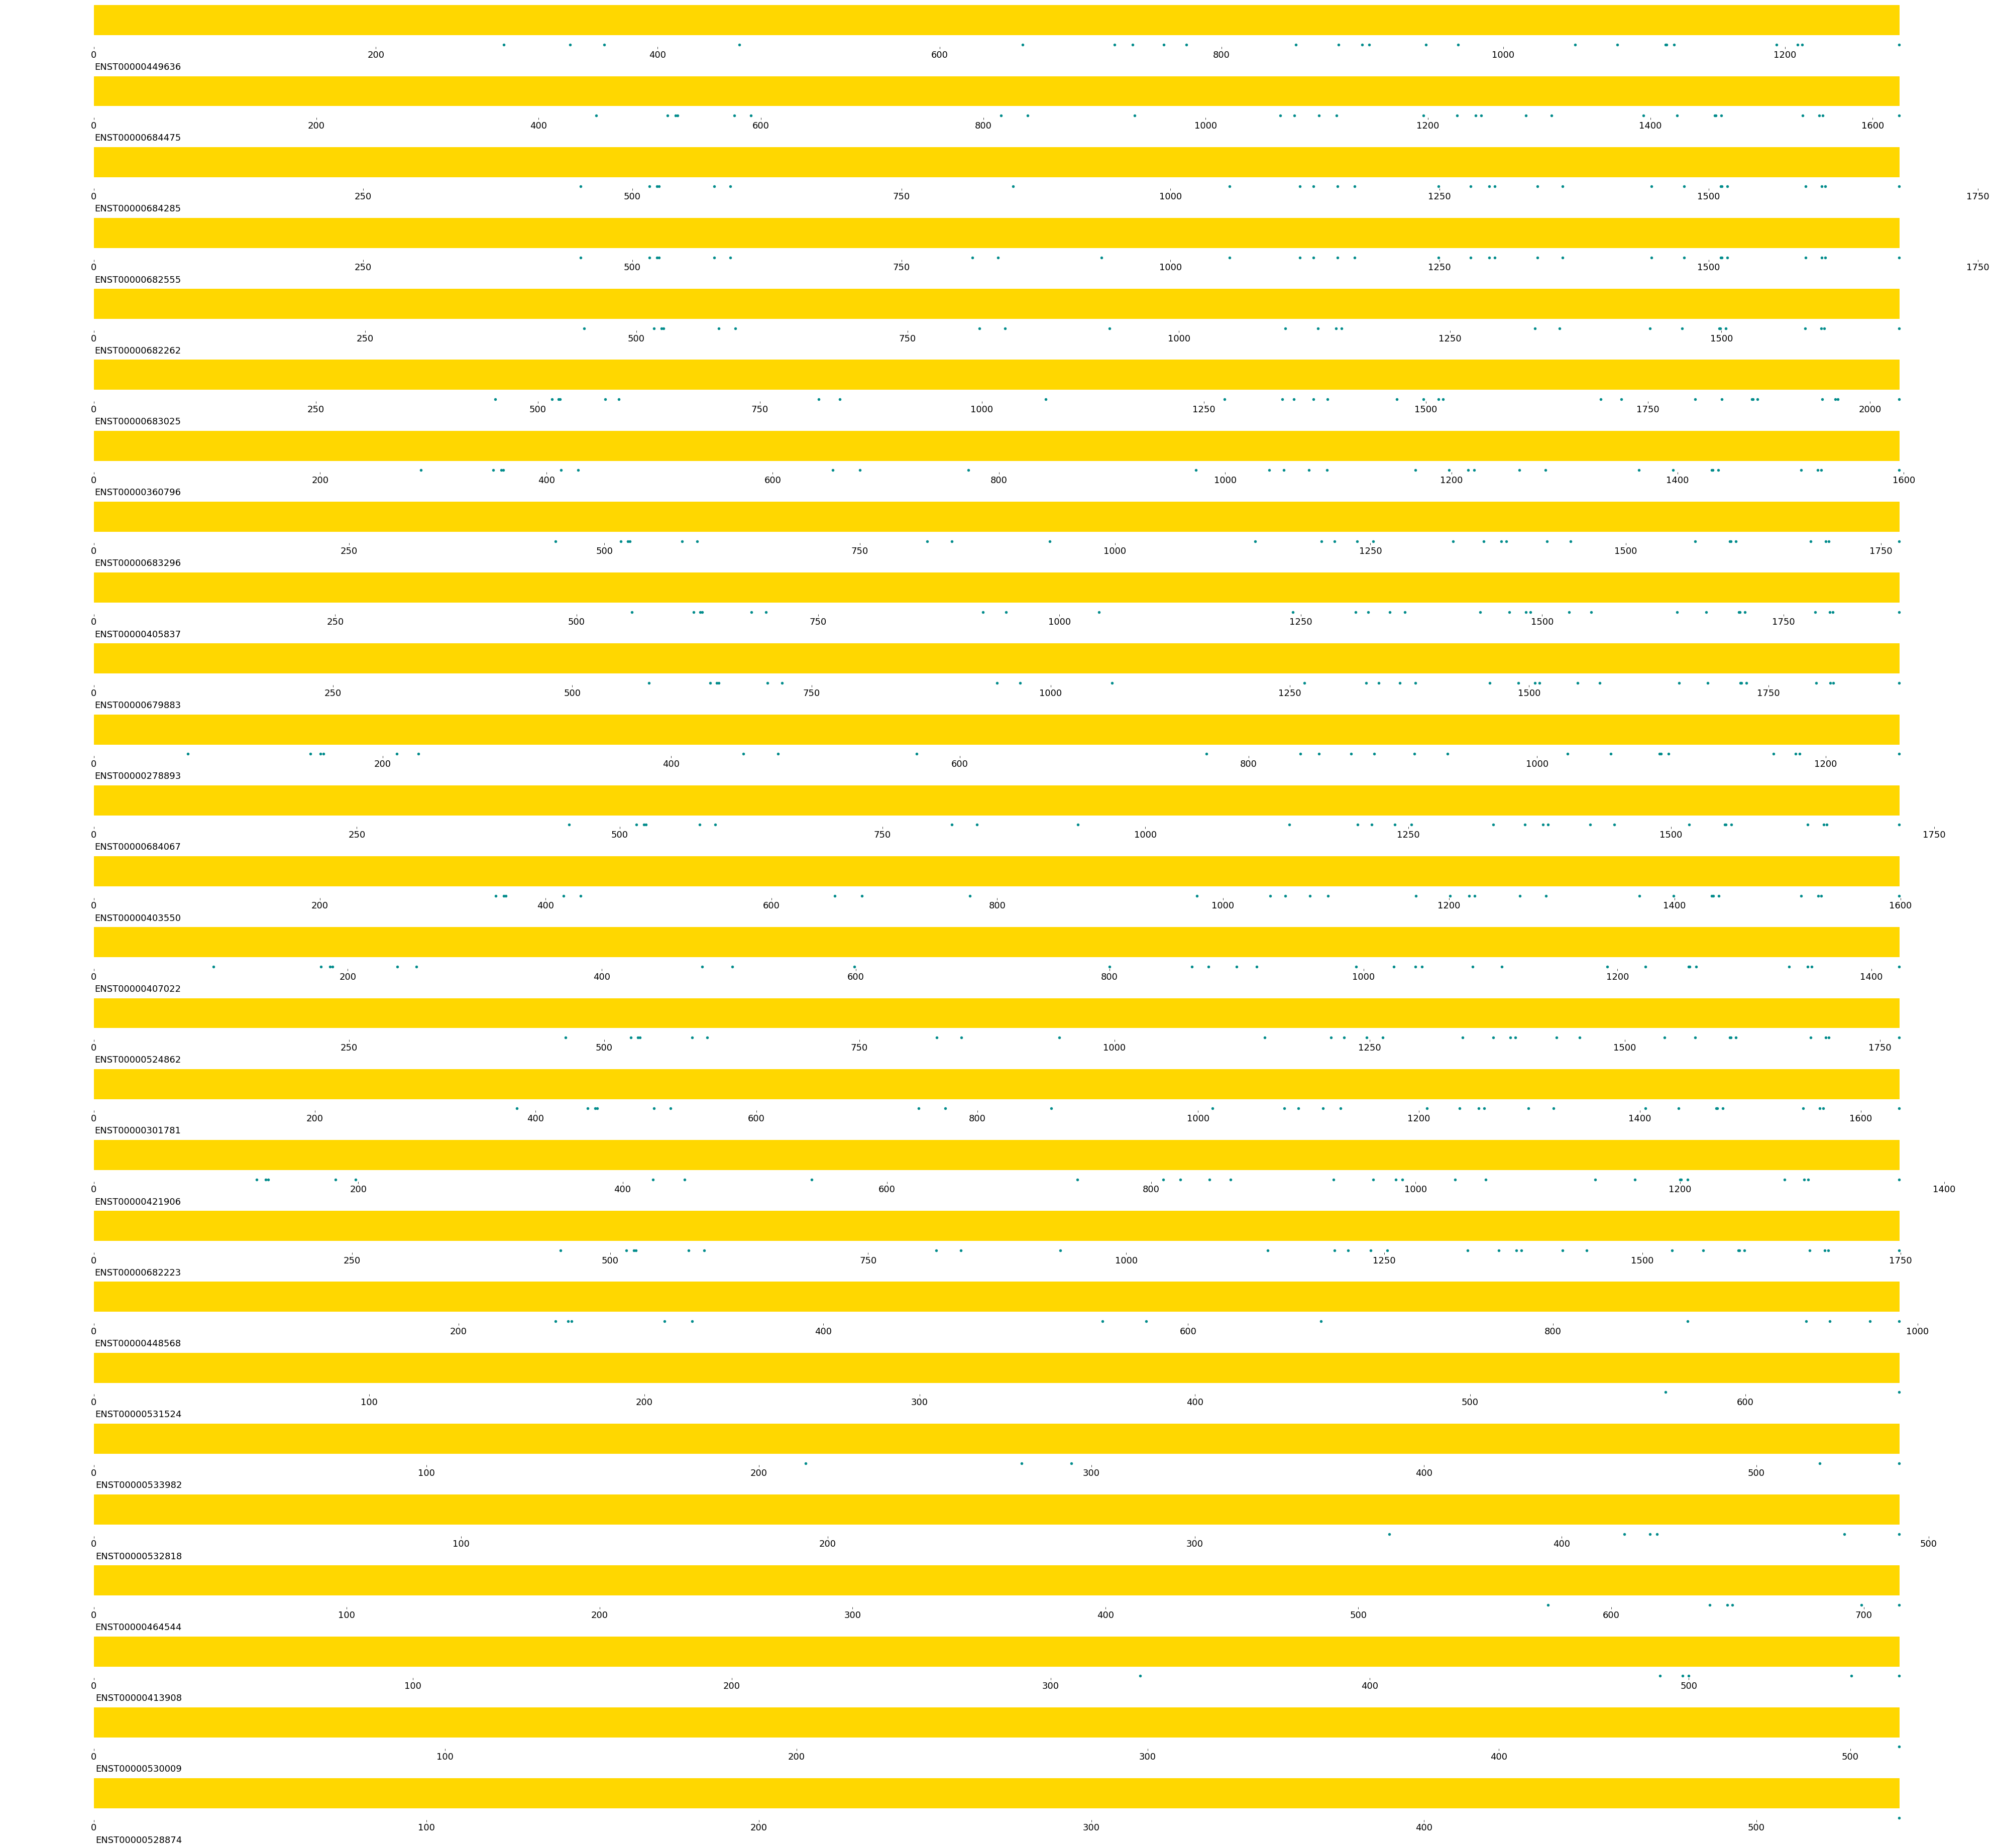

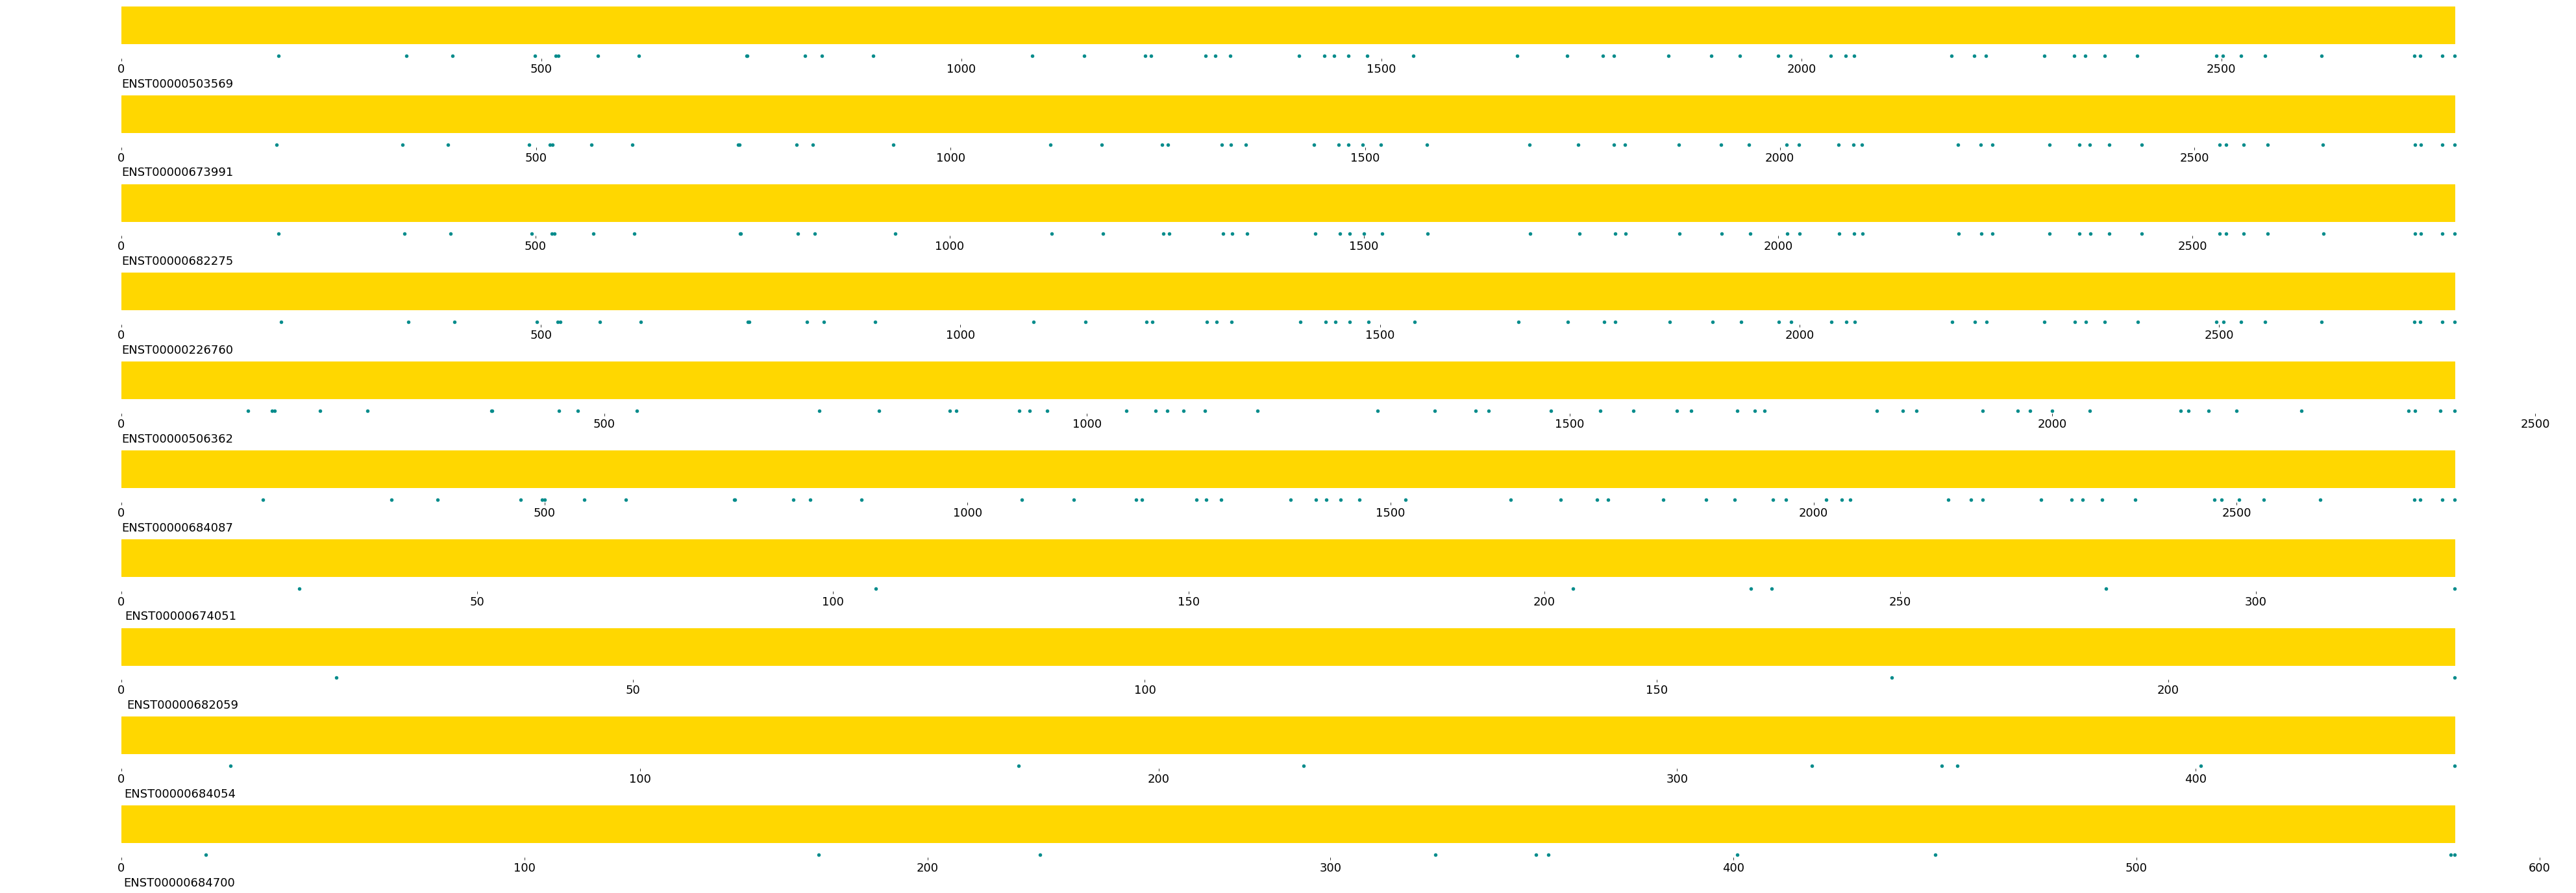

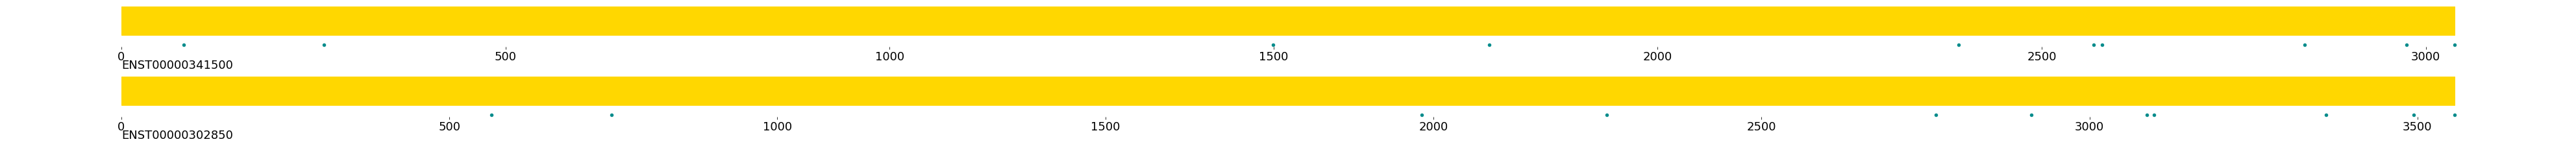

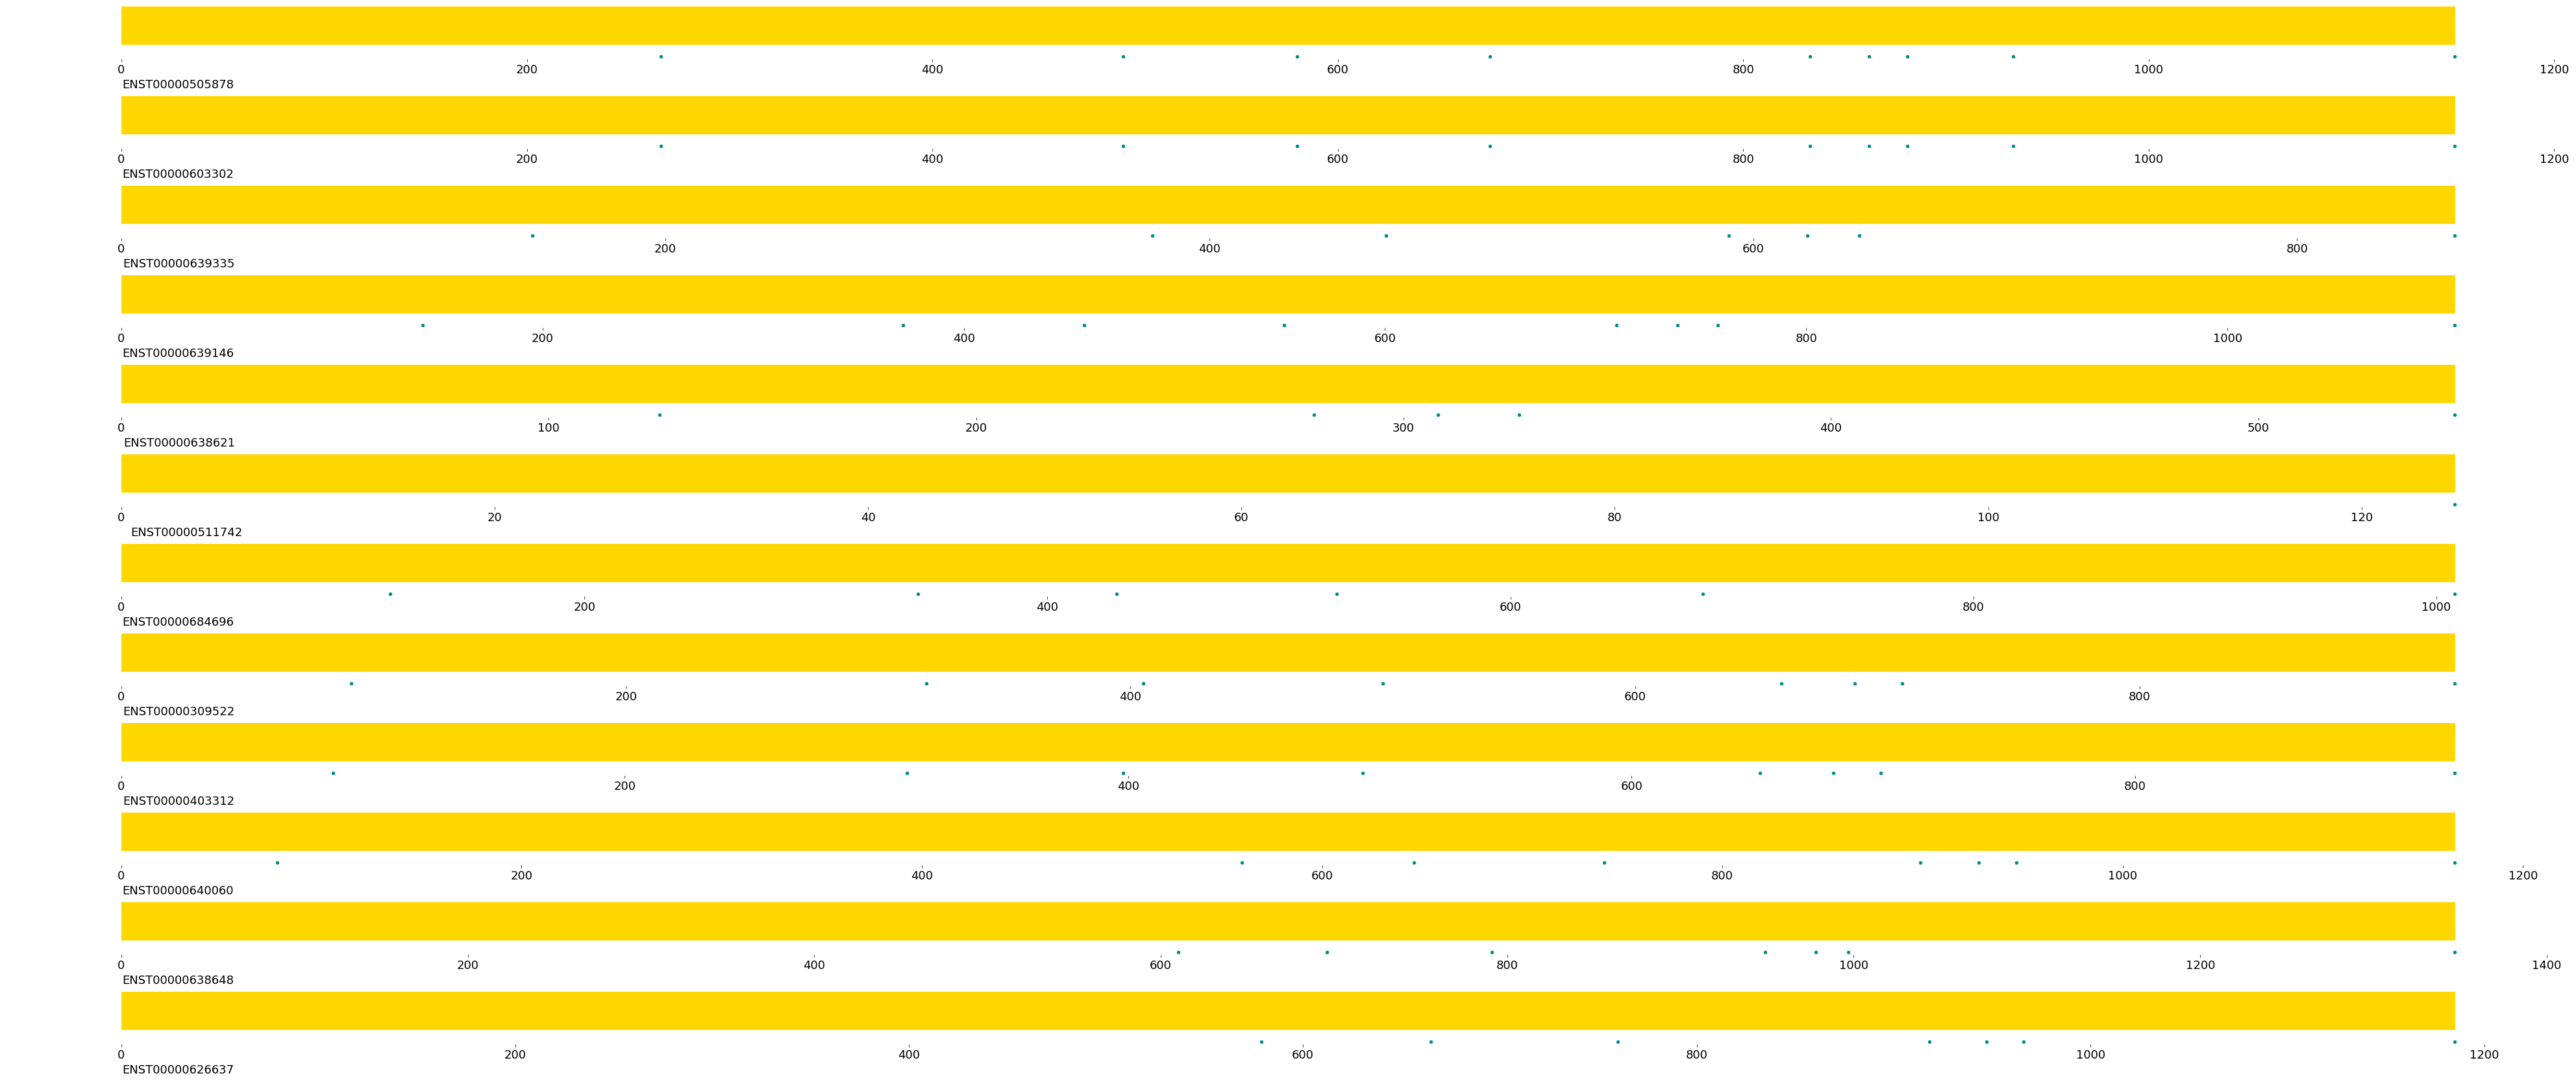

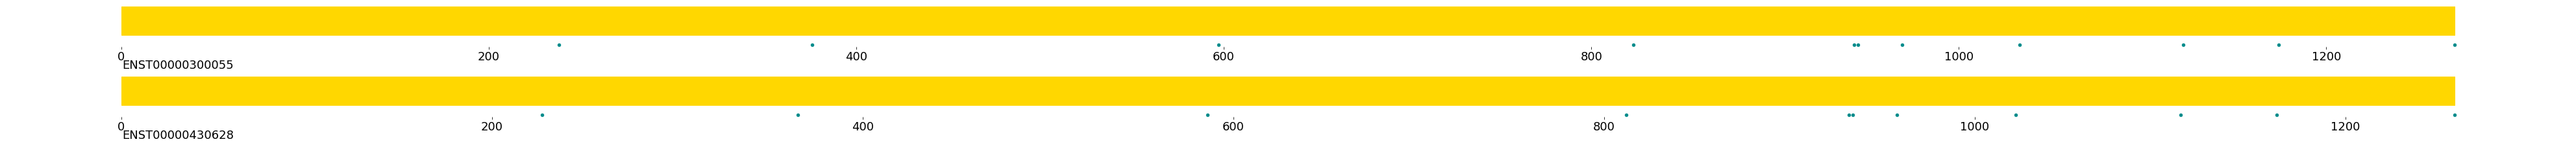

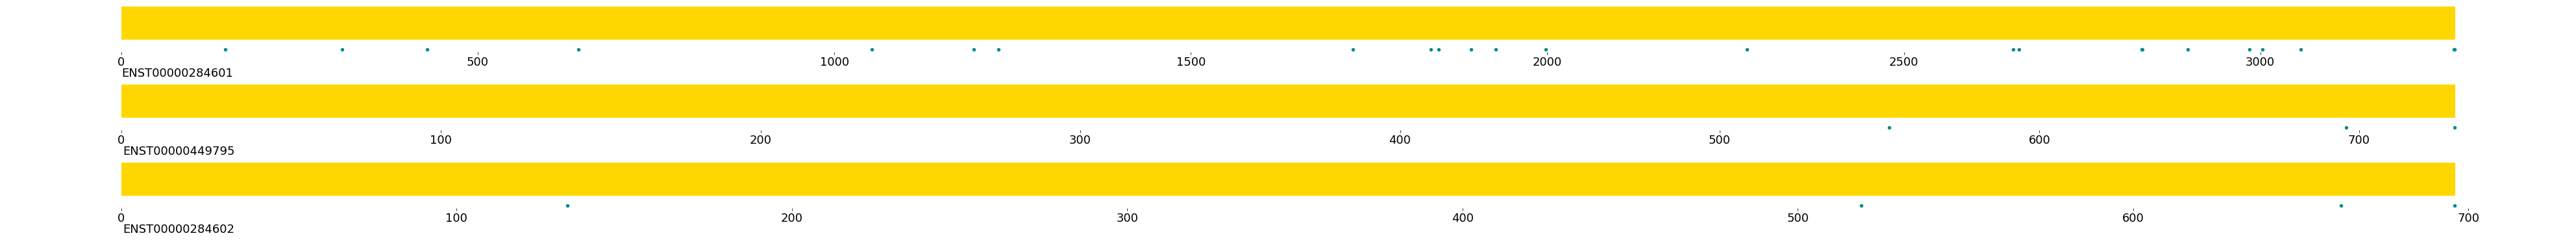

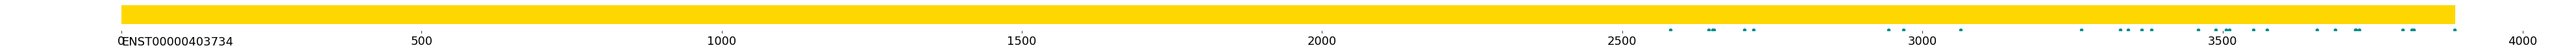

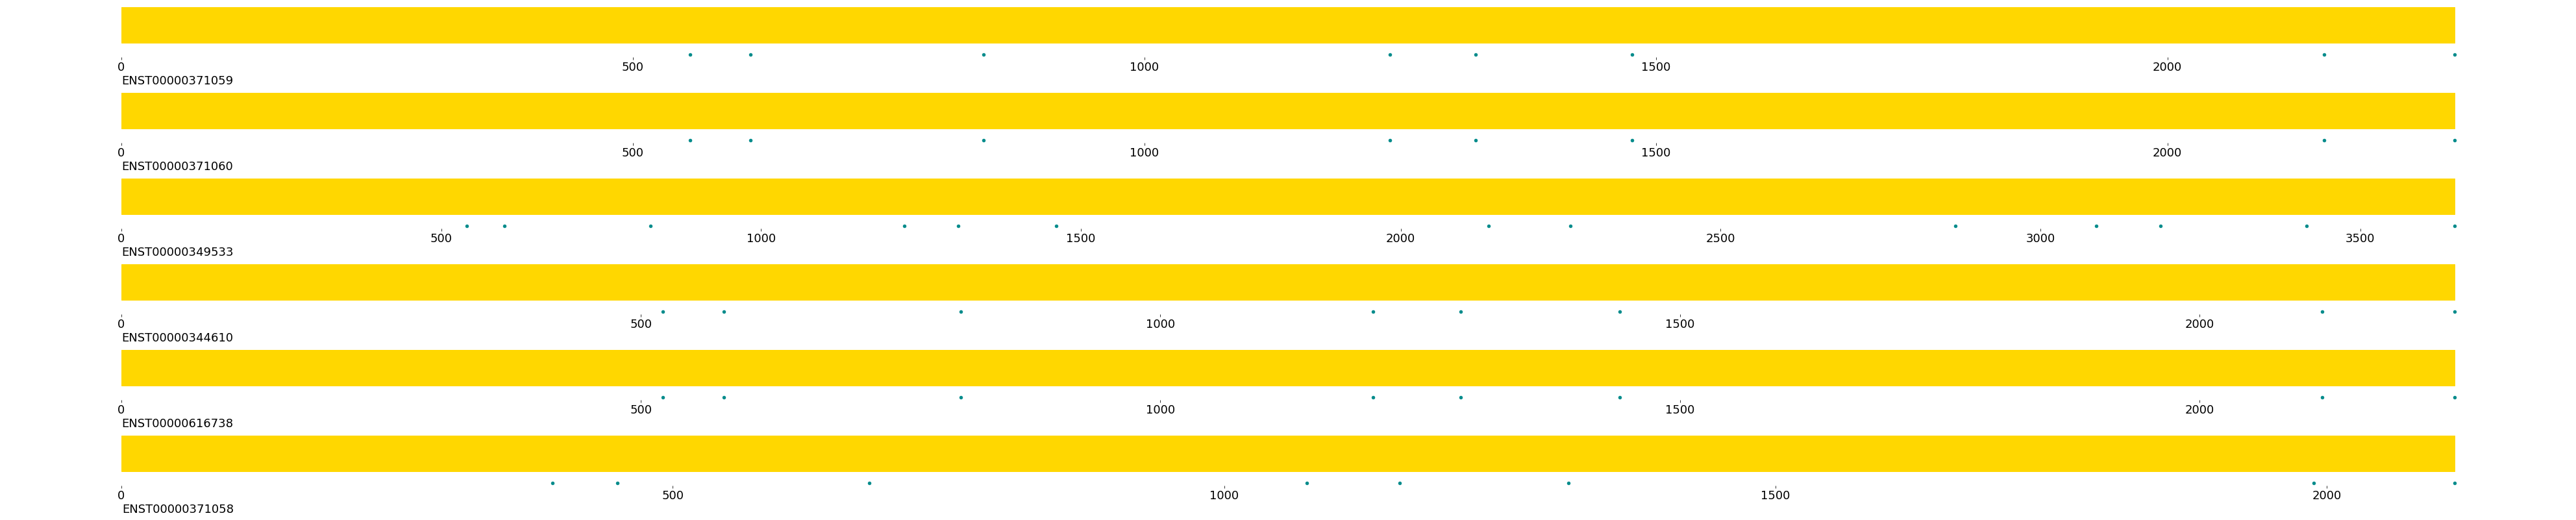

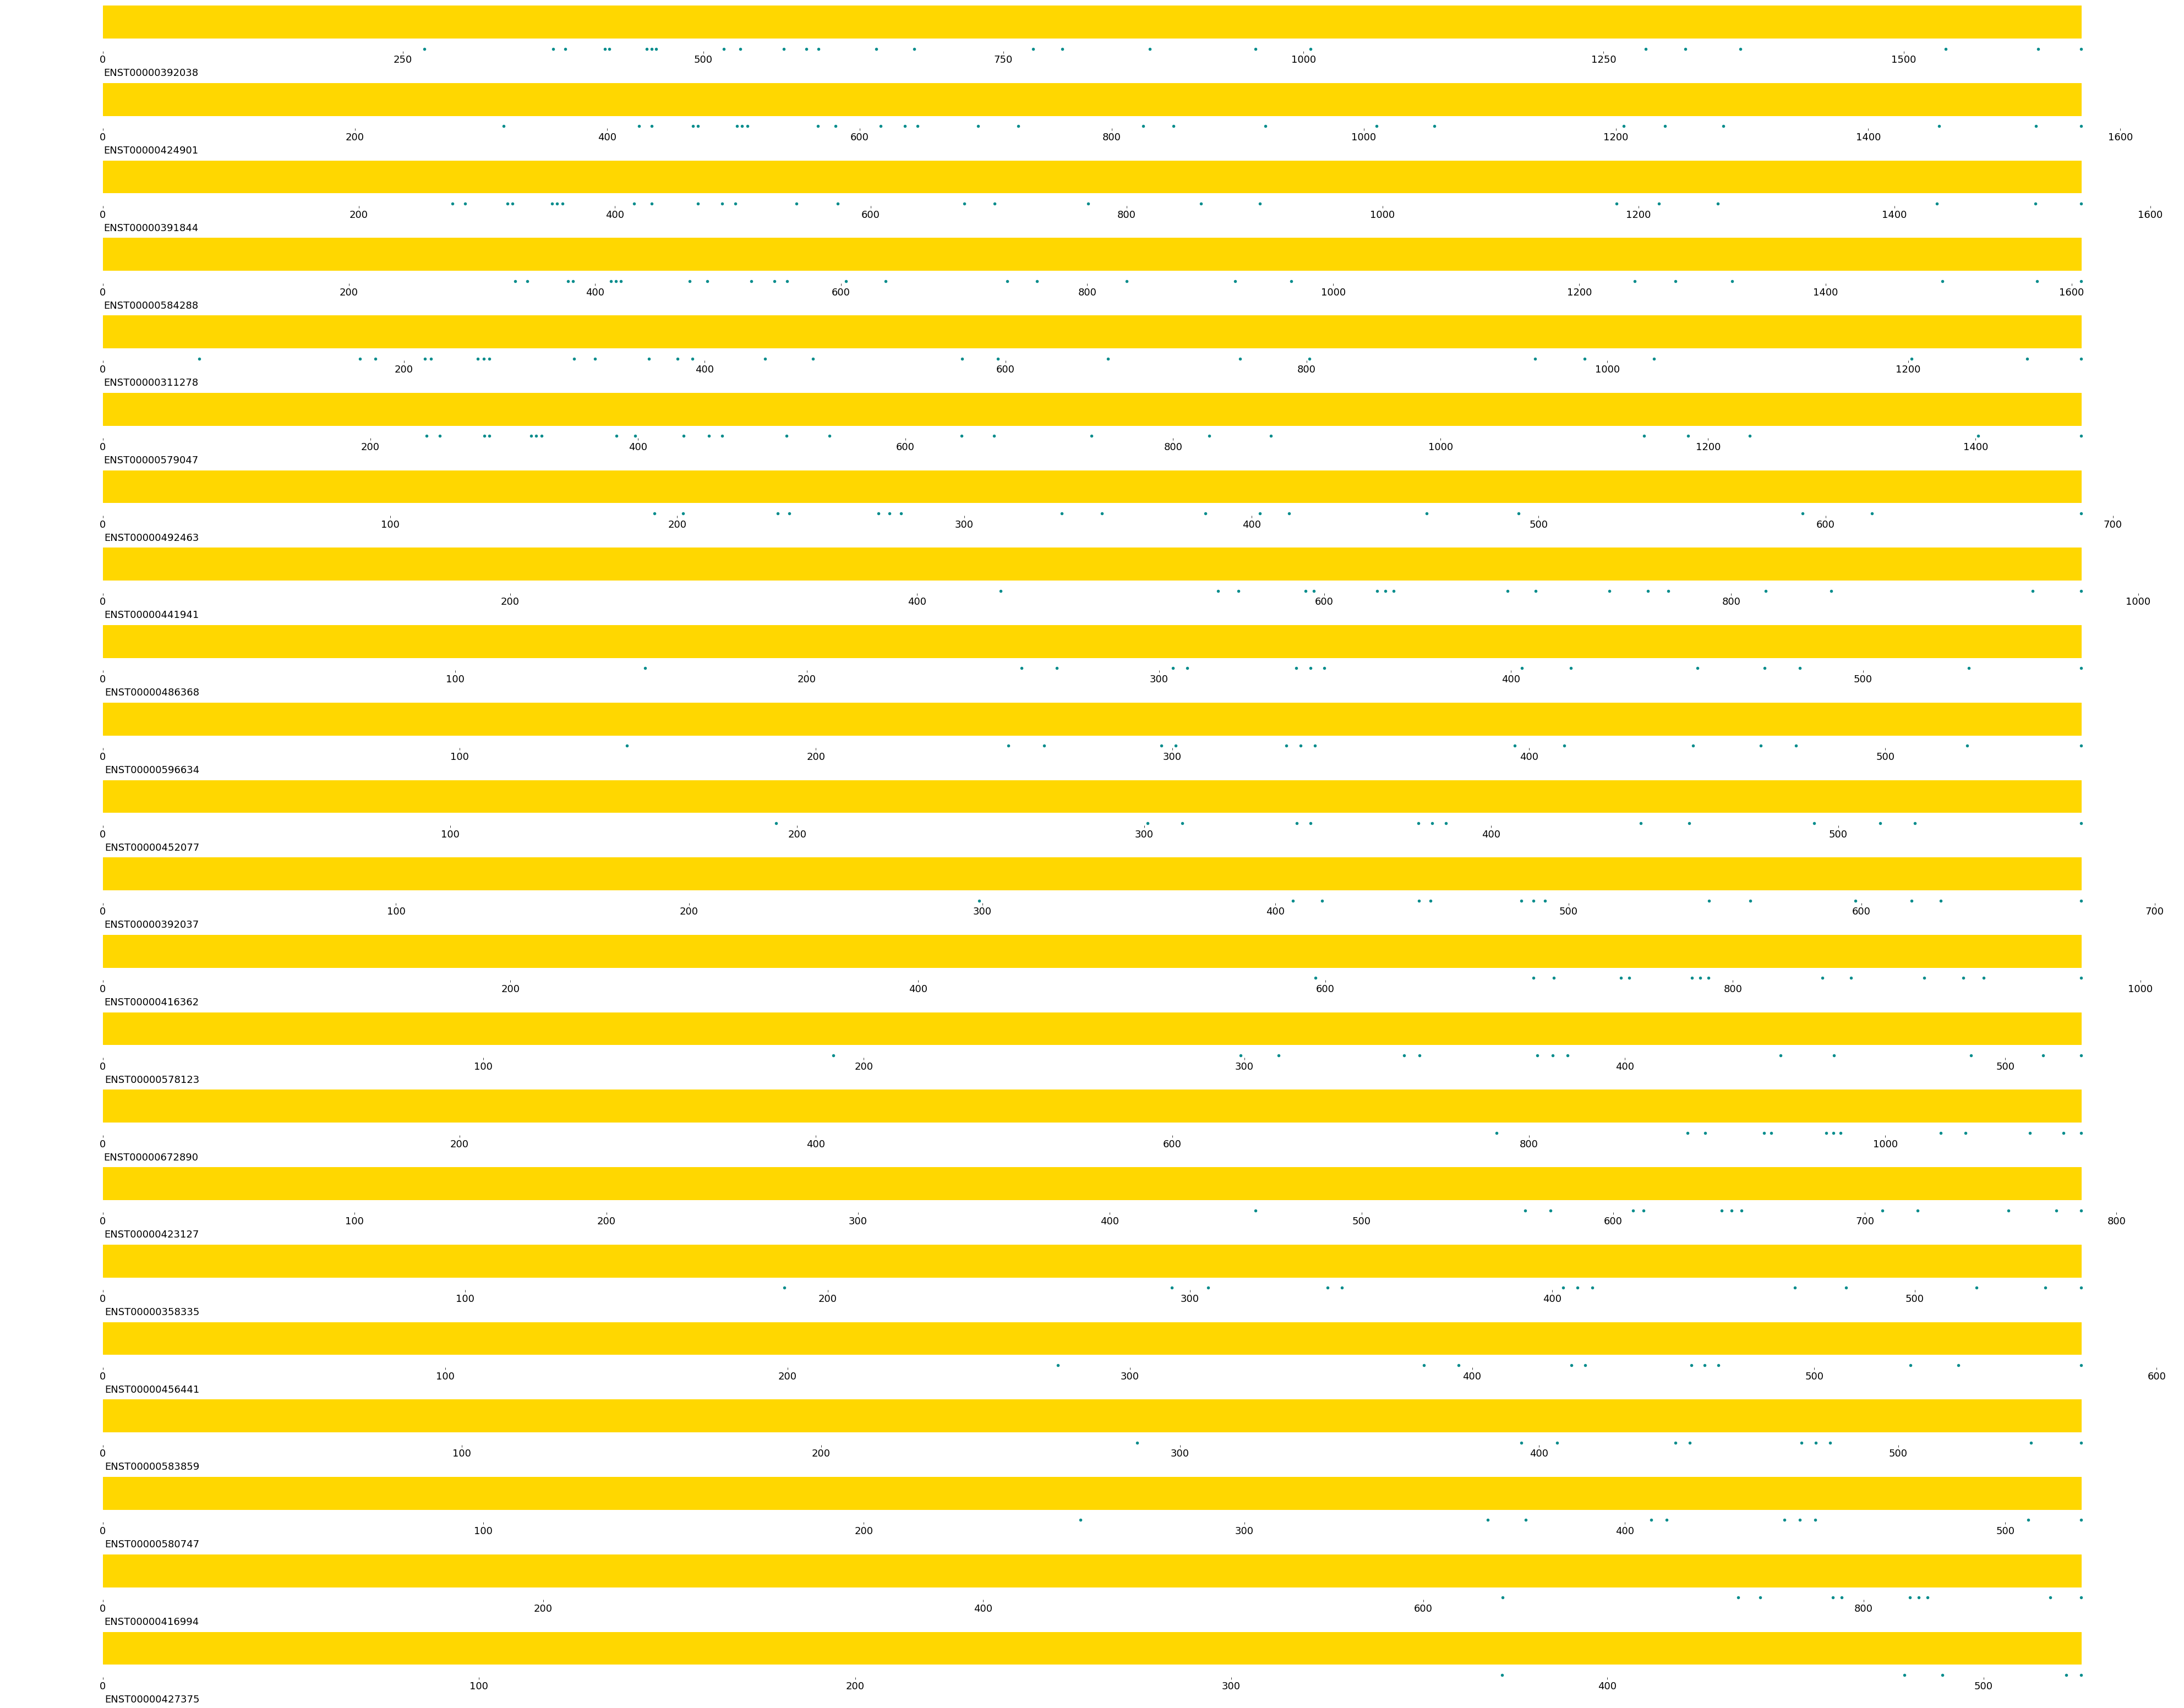

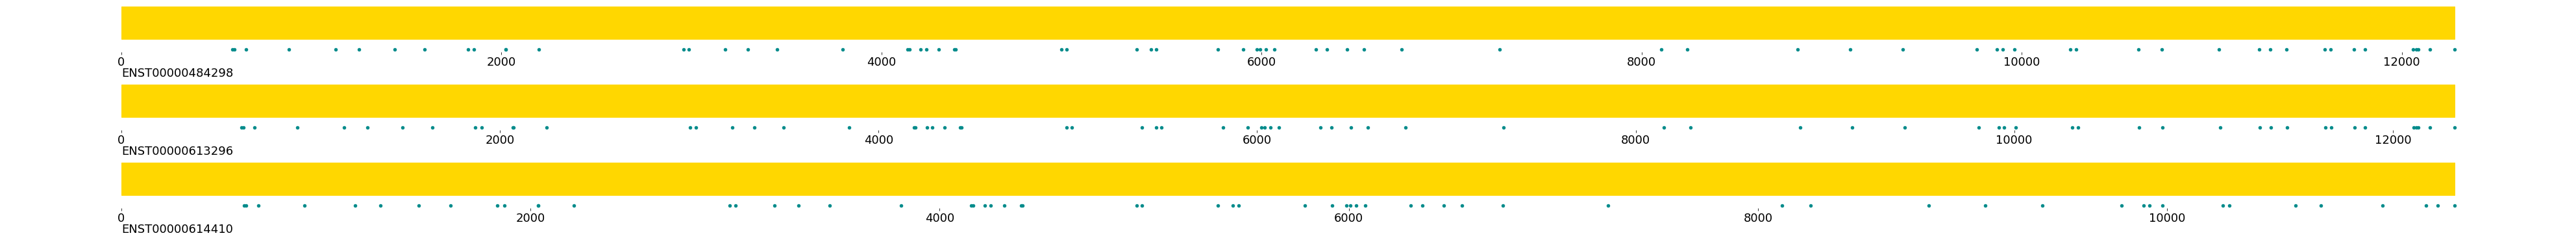

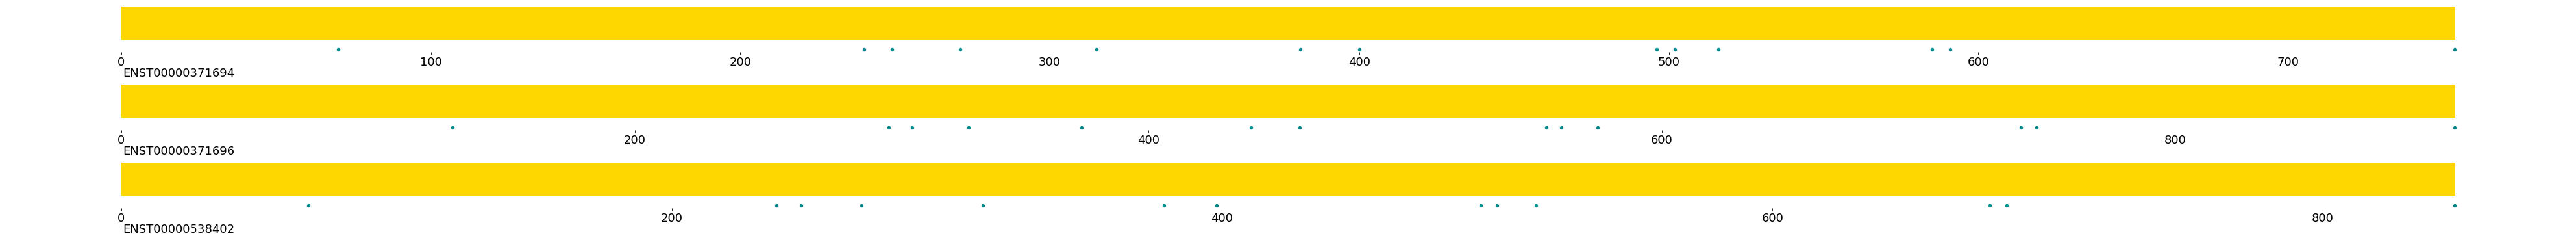

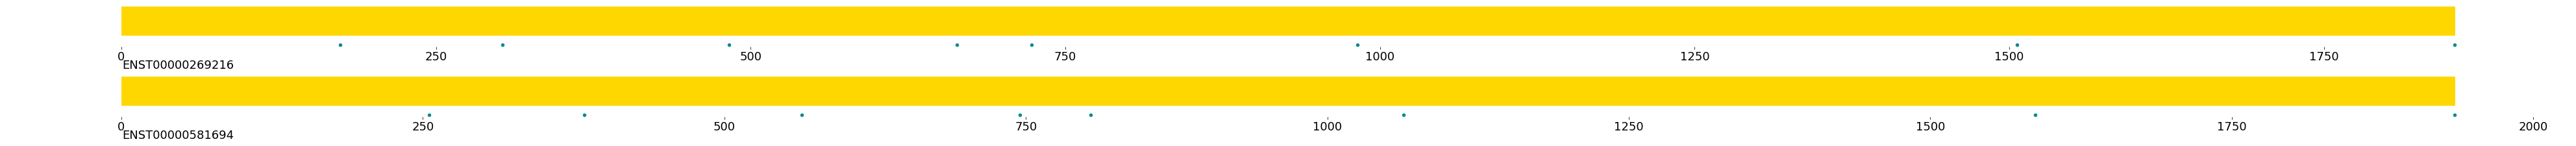

In [71]:
for gene in level1_only_genes:
    if int(info_df['variants'][info_df['gene'] == gene]) > 10:
        gene_df = var_gene_names[var_gene_names['gene_name'] == gene]
        
        number_of_transcr = int(info_df['transcripts'][info_df['gene'] == gene])
        fig = plt.figure(figsize=(55, (number_of_transcr * 2 - 1)), constrained_layout=True)
        gs = GridSpec(number_of_transcr, 1, figure=fig)
        
        pos_of_subplot = 0
        for transcriptID in gene_df['transcript_id'].unique().tolist():
            single_trans_df = gene_df[gene_df['transcript_id'] == transcriptID].reset_index(drop=True)
            sequence = single_trans_df['cDNA_sequence'][0]
            cDNA_change = single_trans_df['cDNA_change'].drop_duplicates().tolist()
            cDNA_change.sort(key = lambda x: int(x.split(':')[0]))
            
            ### position1
            sequence_pos = []
            sequence = single_trans_df['cDNA_sequence'][0]
            for change in cDNA_change:
                if change[0] != '-':
                    pos = int(change.split(':')[0]) + 1
                    if pos not in sequence_pos:
                        sequence_pos.append(pos)
                        
            y_numbers = str(1) * len(sequence_pos)
            y_int_number_list = []
            for el in y_numbers:
                y_int_number_list.append(int(el))
            
            ax = fig.add_subplot(gs[pos_of_subplot, :])    
            ax.scatter(sequence_pos, y_int_number_list, s=20, label="all_var", color='darkcyan')
            ax.add_patch(Rectangle((0, 1.2), max(sequence_pos), 0.6, color='gold'))
            ax.yaxis.set_visible(False)
            ax.spines[["left", "top", "right", "bottom"]].set_visible(False)
            ax.text(0.5, 0.5, transcriptID, fontsize=18)
            ax.tick_params(labelsize=18)
            pos_of_subplot = pos_of_subplot + 1
                
        fig.savefig('/Users/ksenia/Documents/MODY_genes/visualization/' + gene + '_cDNA.png', dpi=300)
        print(gene)
